**Charline Curaut : 3810013**

# PIMA : enhancement of vesselness filters in medical application

## Generals for both filters

Some useful libraries

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from scipy.ndimage.filters import convolve
import skimage.filters

Images and annotations loading

In [16]:
image109 = np.array(Image.open('images/images/109.jpg'))
annot109 = np.array(Image.open('images/annotations/109.jpg'))
test_img_109 = image109[:,:,0]
image108 = np.array(Image.open('images/images/108.jpg'))
annot108 = np.array(Image.open('images/annotations/108.jpg'))
test_img_108 = image108[:,:,0]

Some useful fonctions

In [125]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()

def invert(image) :
    return 255 - image

def subtract(image1, image2) :
    res = image1 - image2
    #return np.where(res<0, 0, res)
    return res

In [18]:
def imagePad(I,h) :
    """ Array[n, m]*int->Array[n+2*h, m+2*h]
    """
    mat1 = np.hstack((np.zeros((I.shape[0], h)), I, np.zeros((I.shape[0], h))))
    mat2 = np.vstack((np.zeros((h, mat1.shape[1])), mat1, np.zeros((h, mat1.shape[1]))))
    return mat2

In [19]:
def threshold(matrix, thr) :
    """ Array[n, m] * float -> Array[n, m]
        return the image thresholded with the threshold value thr
    """
    return np.where(matrix>thr, matrix, 0)

## General Tests

#### Plots of images and kernel tests

Text(0.5, 1.0, 'filtre gaussien, sigma=1')

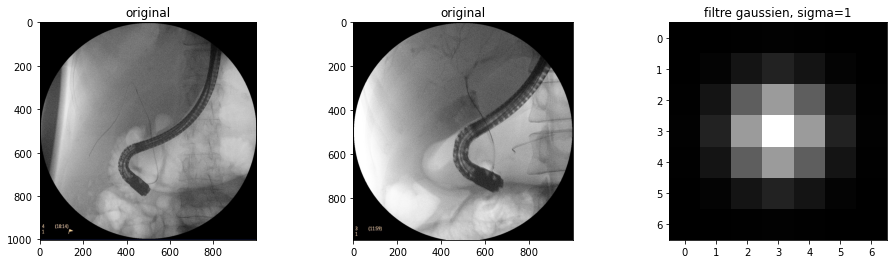

In [176]:
gauss = gaussianKernel(1)

fig = plt.figure(figsize=plt.figaspect(0.25))
    
ax = fig.add_subplot(1, 3, 1)
ax.imshow(image109,cmap="gray")
ax.set_title("original")

ax = fig.add_subplot(1, 3, 2)
ax.imshow(image108,cmap="gray")
ax.set_title("original")

ax = fig.add_subplot(1, 3, 3)
ax.imshow(gauss,cmap="gray")
ax.set_title("filtre gaussien, sigma=1")

Text(0.5, 1.0, 'gaussian filter on pixels 2')

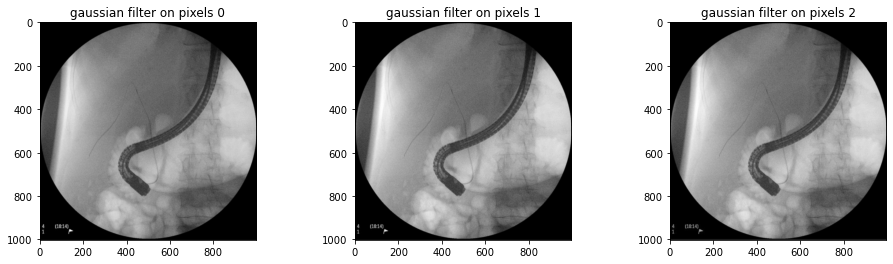

In [177]:
f0 = scipy.signal.convolve2d(image109[:,:,0],gauss,mode='same')
f1 = scipy.signal.convolve2d(image109[:,:,1],gauss,mode='same')
f2 = scipy.signal.convolve2d(image109[:,:,2],gauss,mode='same')

fig = plt.figure(figsize=plt.figaspect(0.25))
    
ax = fig.add_subplot(1, 3, 1)
ax.imshow(f0,cmap="gray")
ax.set_title("gaussian filter on pixels 0")

ax = fig.add_subplot(1, 3, 2)
ax.imshow(f1,cmap="gray")
ax.set_title("gaussian filter on pixels 1")

ax = fig.add_subplot(1, 3, 3)
ax.imshow(f2,cmap="gray")
ax.set_title("gaussian filter on pixels 2")

dimensions :  (991, 1000)  et  (1021, 1030)


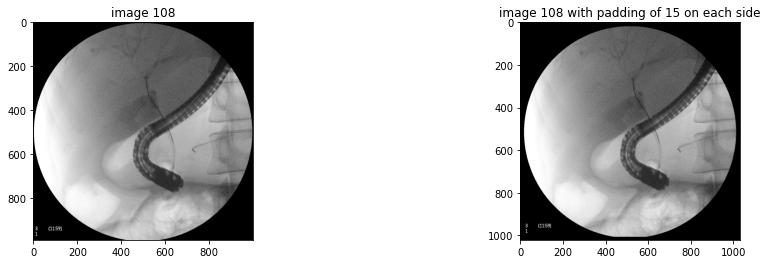

In [178]:
fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(test_img_108,cmap="gray")
ax.set_title("image 108")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(imagePad(test_img_108,15),cmap="gray")
ax.set_title("image 108 with padding of 15 on each side")

print("dimensions : ", test_img_108.shape," et ", imagePad(test_img_108,15).shape)

## 

## Wire pourcentage inside the images

In [208]:
def percent_wire(image) :
    dim = image.shape
    
    nb_white = np.count_nonzero(image == 1)
    nb_total = dim[0]*dim[1]
    
    return nb_white/nb_total

def percent_wire_total(images) :
    tab = []
    
    for image in images :
        tab.append(percent_wire(image))
        
    res = np.array(tab)
    
    return np.mean(res), np.std(res)

In [212]:
nums_images = ["12","13","14","15","28","29","30","31","44","45","108","109","110","120","121","122"]
annots = []
for num in nums_images :
    link = 'images/annotations/' + num + '.jpg'
    annot = np.array(Image.open(link))[:,:,0]
    annots.append(annot)
    
print(percent_wire_total(annots))

(0.0009165819351155914, 0.0002983259539261931)


## 

## Restraining the image to the wire zone

In [220]:
def wire_zone(image) :
    dim = image.shape
    
    left = 0
    high = 0
    low,right = dim
    
    
    for y in range(dim[1]) :
        if 1.0 in image[:,y] :
            left = y
            break
            
    for y in range(dim[1]-1,-1,-1) :
        if 1.0 in image[:,y] :
            right = y
            break
    
    for x in range(dim[0]) :
        if 1.0 in image[x,:] :
            high = x
            break
            
    for x in range(dim[0]-1,-1,-1) :
        if 1.0 in image[x,:] :
            low = x
            break
        
    return high, low, left, right

In [221]:
annot108 = np.array(Image.open('images/annotations/108.jpg'))[:,:,0]
annot109 = np.array(Image.open('images/annotations/109.jpg'))[:,:,0]
annot110 = np.array(Image.open('images/annotations/110.jpg'))[:,:,0]
annot12 = np.array(Image.open('images/annotations/12.jpg'))[:,:,0]
annot13 = np.array(Image.open('images/annotations/13.jpg'))[:,:,0]
annot14 = np.array(Image.open('images/annotations/14.jpg'))[:,:,0]
annot15 = np.array(Image.open('images/annotations/15.jpg'))[:,:,0]
annot120 = np.array(Image.open('images/annotations/120.jpg'))[:,:,0]
annot121 = np.array(Image.open('images/annotations/121.jpg'))[:,:,0]
annot122 = np.array(Image.open('images/annotations/122.jpg'))[:,:,0]
annot28 = np.array(Image.open('images/annotations/28.jpg'))[:,:,0]
annot29 = np.array(Image.open('images/annotations/29.jpg'))[:,:,0]
annot30 = np.array(Image.open('images/annotations/30.jpg'))[:,:,0]
annot31 = np.array(Image.open('images/annotations/31.jpg'))[:,:,0]
annot44 = np.array(Image.open('images/annotations/44.jpg'))[:,:,0]
annot45 = np.array(Image.open('images/annotations/45.jpg'))[:,:,0]

Text(0.5, 1.0, 'wire zone of image 108')

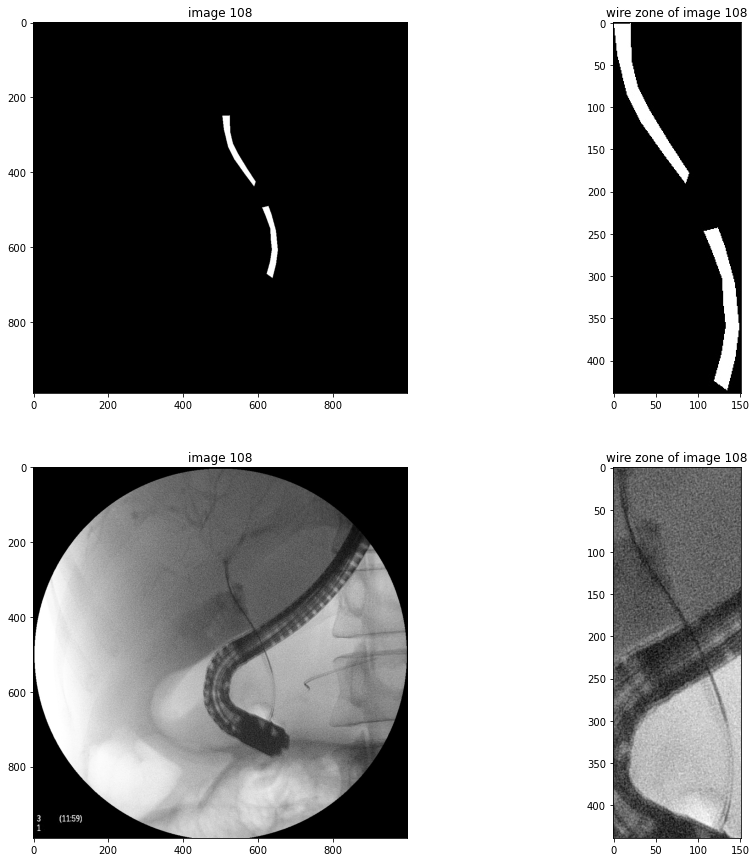

In [226]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(2, 2, 1)
ax.imshow(annot108,cmap="gray")
ax.set_title("image 108")

ax = fig.add_subplot(2, 2, 2)
high_108, low_108, left_108, right_108 = wire_zone(annot108)
ax.imshow(annot108[high_108:low_108, left_108:right_108],cmap="gray")
ax.set_title("wire zone of image 108")

ax = fig.add_subplot(2, 2, 3)
ax.imshow(test_img_108,cmap="gray")
ax.set_title("image 108")

ax = fig.add_subplot(2, 2, 4)
ax.imshow(test_img_108[high_108:low_108, left_108:right_108],cmap="gray")
ax.set_title("wire zone of image 108")

Text(0.5, 1.0, 'wire zone of image 109')

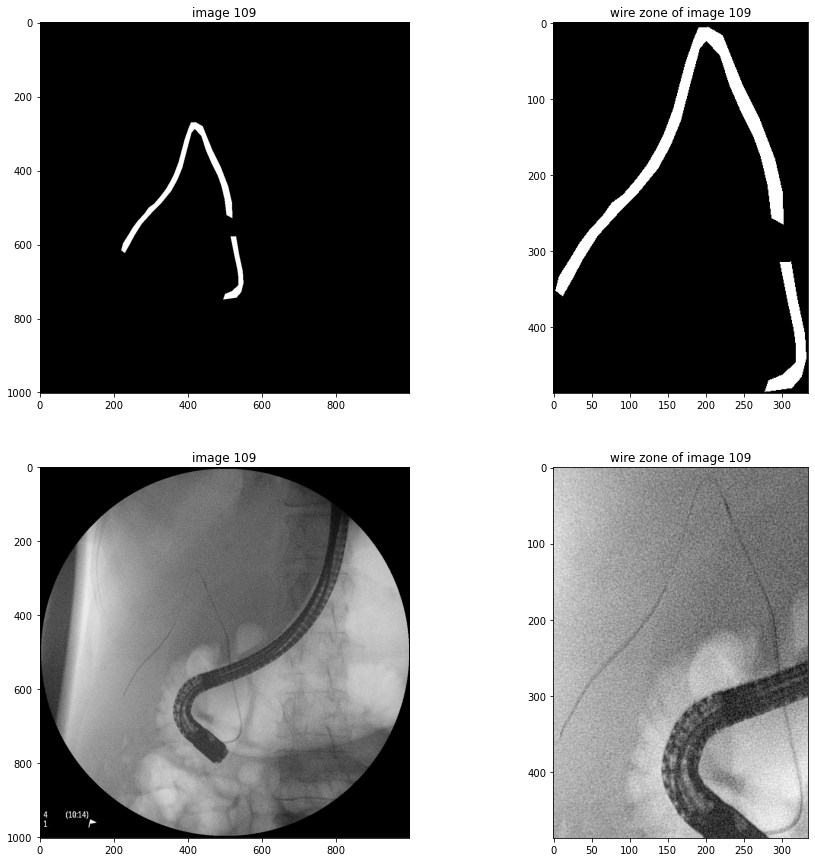

In [290]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(2, 2, 1)
ax.imshow(annot109,cmap="gray")
ax.set_title("image 109")

ax = fig.add_subplot(2, 2, 2)
high_109, low_109, left_109, right_109 = wire_zone(annot109) 
ax.imshow(annot109[high_109:low_109, left_109:right_109],cmap="gray")
ax.set_title("wire zone of image 109")

ax = fig.add_subplot(2, 2, 3)
ax.imshow(test_img_109,cmap="gray")
ax.set_title("image 109")

ax = fig.add_subplot(2, 2, 4)
ax.imshow(test_img_109[high_109:low_109, left_109:right_109],cmap="gray")
ax.set_title("wire zone of image 109")

# 

## Hessian matrix : 
- application of a Gaussian kernel of standard deviation σ on the image.
- Computation of the directionnal derivate $I_x$ and $I_y$. Using the Sobel kernel.
- Computation of the double directionnal derivate $I_{xx}$, $I_{xy}$, $I_{yy}$.

In [179]:
def hessian_matrix_sobel2(image, scale) :
    """ Array[n, m]*float->Array[n*n, m*m]
        return the Hessian matrix from an image
    """
    gauss = gaussianKernel(scale)
    f = scipy.signal.convolve2d(image,gauss,mode='same')
    
    # derivative filter
    sobelY = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    sobelX = np.transpose(sobelY)
    
    # first derivatives calculation
    Ix = scipy.signal.convolve2d(f,sobelX,mode='same')
    Iy = scipy.signal.convolve2d(f,sobelY,mode='same')
    
    # second derivatives calculation
    Ixx = scipy.signal.convolve2d(Ix,sobelX,mode='same')
    Ixy = scipy.signal.convolve2d(Ix,sobelY,mode='same')
    Iyy = scipy.signal.convolve2d(Iy,sobelY,mode='same')
    
    return f, Ix, Iy, Ixx, Ixy, Iyy

In [180]:
def hessian_matrix_sobel(image,scale) :
    _, _, _, Ixx, Ixy, Iyy = hessian_matrix_sobel2(image, scale)
    return Ixx, Ixy, Iyy

In [181]:
Ixx_109s, Ixy_109s, Iyy_109s = hessian_matrix_sobel(test_img_109, 3)
print("matrix Ixx :\n",Ixx_109s,"\n")
print("matrix Ixy :\n",Ixy_109s, "\n")
print("matrix Iyy :\n",Iyy_109s, "\n")

matrix Ixx :
 [[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [ 13.32614076 -28.93900775  -5.56219876 ...  -5.56219876 -28.93900775
   13.32614076]
 [ 13.17037093 -28.60073844  -5.49718198 ...  -5.49718198 -28.60073844
   13.17037093]
 [  8.86733969 -19.25628858  -3.70113949 ...  -3.70113949 -19.25628858
    8.86733969]] 

matrix Ixy :
 [[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [  4.08329997   3.39540676   1.87530505 ...  -1.87530505  -3.39540676
   -4.08329997]
 [ -5.16660779  -4.2962151   -2.37282731 ...   2.37282731   4.2962151
    5.16660779]
 [-24.75900298 -20.58797704 -11.37087249 ...  11.37

In [182]:
print(Ixx_109s.shape, Ixy_109s.shape, Iyy_109s.shape)

(1002, 998) (1002, 998) (1002, 998)


In [183]:
print(Ixx_109s.min(), Ixx_109s.max())
print(Ixy_109s.min(), Ixy_109s.max())
print(Iyy_109s.min(), Iyy_109s.max())

-483.3945734178245 737.755597813168
-309.4136354307877 282.06826511568323
-676.5990011234418 359.0262411784637


The results are a bit weird, the values in the end should be zero (or at least around zero) but they seem really high. That is strange because in this part of the image, there is nothing else that black : no particular structures so nothing to find by the derivative filters. 
Explanation after doing some research : Sobel Kernel = gaussian filter x derivative filter but we already applied a Gaussien filter, maybe it's to much. For the next attempt of hessian function, we will try to only use the derivative filter.

Trying another convolution to derivate the image :

In [184]:
def hessian_matrix_corrected(image, scale) :
    """ Array[n, m]*float->Array[n*n, m*m]
        return the Hessian matrix from an image
    """
    gauss = gaussianKernel(scale)
    f = scipy.signal.convolve2d(image,gauss,mode='same')
    
    # derivative filter
    Kx = np.array([[0, 0, 0],[1, 0, -1], [0, 0, 0]])
    Ky = Kx.T

    # first derivatives calculation
    Ix = scipy.signal.convolve2d(f,Kx,mode='same')
    Iy = scipy.signal.convolve2d(f,Ky,mode='same')
    
    # second derivatives calculation
    Ixx = scipy.signal.convolve2d(Ix,Kx,mode='same')
    Ixy = scipy.signal.convolve2d(Ix,Ky,mode='same')
    Iyy = scipy.signal.convolve2d(Iy,Ky,mode='same')
    
    return Ixx, Ixy, Iyy

another test to compare the new results :

In [185]:
Ixx_109c, Ixy_109c, Iyy_109c = hessian_matrix_corrected(test_img_109, 3)
print("matrix Ixx :\n",Ixx_109c, "\n")
print("matrix Ixy :\n",Ixy_109c, "\n")
print("matrix Iyy :\n",Iyy_109c,"\n")

matrix Ixx :
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.86638655 -1.88144246 -0.36162114 ... -0.36162114 -1.88144246
   0.86638655]
 [ 0.91128562 -1.97894515 -0.38036156 ... -0.38036156 -1.97894515
   0.91128562]
 [ 0.87116213 -1.8918131  -0.36361442 ... -0.36361442 -1.8918131
   0.87116213]] 

matrix Ixy :
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.47285953  0.15882314  0.12795966 ... -0.12795966 -0.15882314
  -0.47285953]
 [ 0.0142182   0.00477558  0.00384756 ... -0.00384756 -0.00477558
  -0.0142182 ]
 [-2.71314418 -0.91128562 -0.73419903 ...  0.73419903  0.91128562
   2.71314418]] 

matrix Iyy :
 [[ 0.          0.  

In [186]:
print(Ixx_109c.shape, Ixy_109c.shape, Iyy_109c.shape)

(1002, 998) (1002, 998) (1002, 998)


In [187]:
print(Ixx_109c.min(), Ixx_109c.max())
print(Ixy_109c.min(), Ixy_109c.max())
print(Iyy_109c.min(), Iyy_109c.max())

-30.24685660370308 46.16011212656397
-20.490787594783782 18.356252294778432
-42.78277772339274 22.63523817919995


We obtained better results as they are much nearer from zero than the previous ones. But still, we may try a last solution to see if it can get any better.

In [188]:
def hessian_matrix_final(image, sigma) :
    """ Array[n, m]*float->Array[n*n, m*m]
        return the Hessian matrix from an image
    """
    
    n2 = int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    
    # we directly derivate the gaussian filter : less convolution so more effective
    exp_xy = np.exp(-((x**2 + y**2)/(2*sigma**2)))
    dGauss_xx = (1/(2*np.pi*sigma**4)) * ((x**2/(sigma**2)) - 1) * exp_xy
    dGauss_yy = (1/(2*np.pi*sigma**4)) * ((y**2/(sigma**2)) -1) * exp_xy
    dGauss_xy = ((x*y)/(2*np.pi*sigma**6)) * exp_xy
    
    Ixx = scipy.signal.convolve2d(image,dGauss_xx,mode='same')
    Iyy = scipy.signal.convolve2d(image,dGauss_yy,mode='same')
    Ixy = scipy.signal.convolve2d(image,dGauss_xy,mode='same')
    
    #Ixx = convolve(image, dGauss_xx, mode='constant', cval=0.0, origin=-1)
    #Ixy = convolve(image, dGauss_xy, mode='constant', cval=0.0, origin=-1)
    #Iyy = convolve(image, dGauss_yy, mode='constant', cval=0.0, origin=-1)
    
    return Ixx, Ixy, Iyy
    

In [189]:
Ixx_109f, Ixy_109f, Iyy_109f = hessian_matrix_final(test_img_109, 3)
print("matrix Ixx :\n",Ixx_109f, "\n")
print("matrix Ixy :\n",Ixy_109f, "\n")
print("matrix Iyy :\n",Iyy_109f,"\n")

matrix Ixx :
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.0308325  -0.0770384  -0.10148368 ... -0.10148368 -0.0770384
  -0.0308325 ]
 [-0.03243035 -0.08103079 -0.1067429  ... -0.1067429  -0.08103079
  -0.03243035]
 [-0.03100246 -0.07746304 -0.10204306 ... -0.10204306 -0.07746304
  -0.03100246]] 

matrix Ixy :
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.04711668  0.0420855   0.0335679  ... -0.0335679  -0.0420855
  -0.04711668]
 [ 0.00175603  0.00156852  0.00125107 ... -0.00125107 -0.00156852
  -0.00175603]
 [-0.04603225 -0.04111687 -0.03279531 ...  0.03279531  0.04111687
   0.04603225]] 

matrix Iyy :
 [[ 0.          0.   

In [190]:
print(Ixx_109f.shape, Ixy_109f.shape, Iyy_109f.shape)

(1002, 998) (1002, 998) (1002, 998)


In [191]:
print(Ixx_109f.min(), Ixx_109f.max())
print(Ixy_109f.min(), Ixy_109f.max())
print(Iyy_109f.min(), Iyy_109f.max())

-8.277844605769696 6.5517994189931095
-5.257044676184805 4.646057541253587
-11.355018951059407 5.9722729925606295


The last values are still not equal to zero but none of them is greater than 1.0 (in absolute value).

#### Comparaison of the 3 second derivatives of the same image obtained with each functions :

In [192]:
def normalize(image) :
    mini = image.min()
    image2 = image - mini
    maxi = image2.max()
    if maxi == 0 :
        return 0
    return image2/maxi

In [193]:
def binarization(image, vmin, vmax) :
    res1 = np.where(image<vmin, 1, 0)
    res2 = np.where(image>vmax, 1, res1)
    return res2

In [194]:
Ixx_109s_n = normalize(Ixx_109s)
Ixx_109c_n = normalize(Ixx_109c)
Ixx_109f_n = normalize(Ixx_109f)

Ixy_109s_n = normalize(Ixy_109s)
Ixy_109c_n = normalize(Ixy_109c)
Ixy_109f_n = normalize(Ixy_109f)

Iyy_109s_n = normalize(Iyy_109s)
Iyy_109c_n = normalize(Iyy_109c)
Iyy_109f_n = normalize(Iyy_109f)

In [195]:
print(Ixx_109s_n.min(),Ixx_109s_n.max())
print(Ixx_109c_n.min(),Ixx_109c_n.max())
print(Ixx_109f_n.min(),Ixx_109f_n.max())
print(Ixy_109s_n.min(),Ixy_109s_n.max())
print(Ixy_109c_n.min(),Ixy_109c_n.max())
print(Ixy_109f_n.min(),Ixy_109f_n.max())
print(Iyy_109s_n.min(),Iyy_109s_n.max())
print(Iyy_109c_n.min(),Iyy_109c_n.max())
print(Iyy_109f_n.min(),Iyy_109f_n.max())

0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


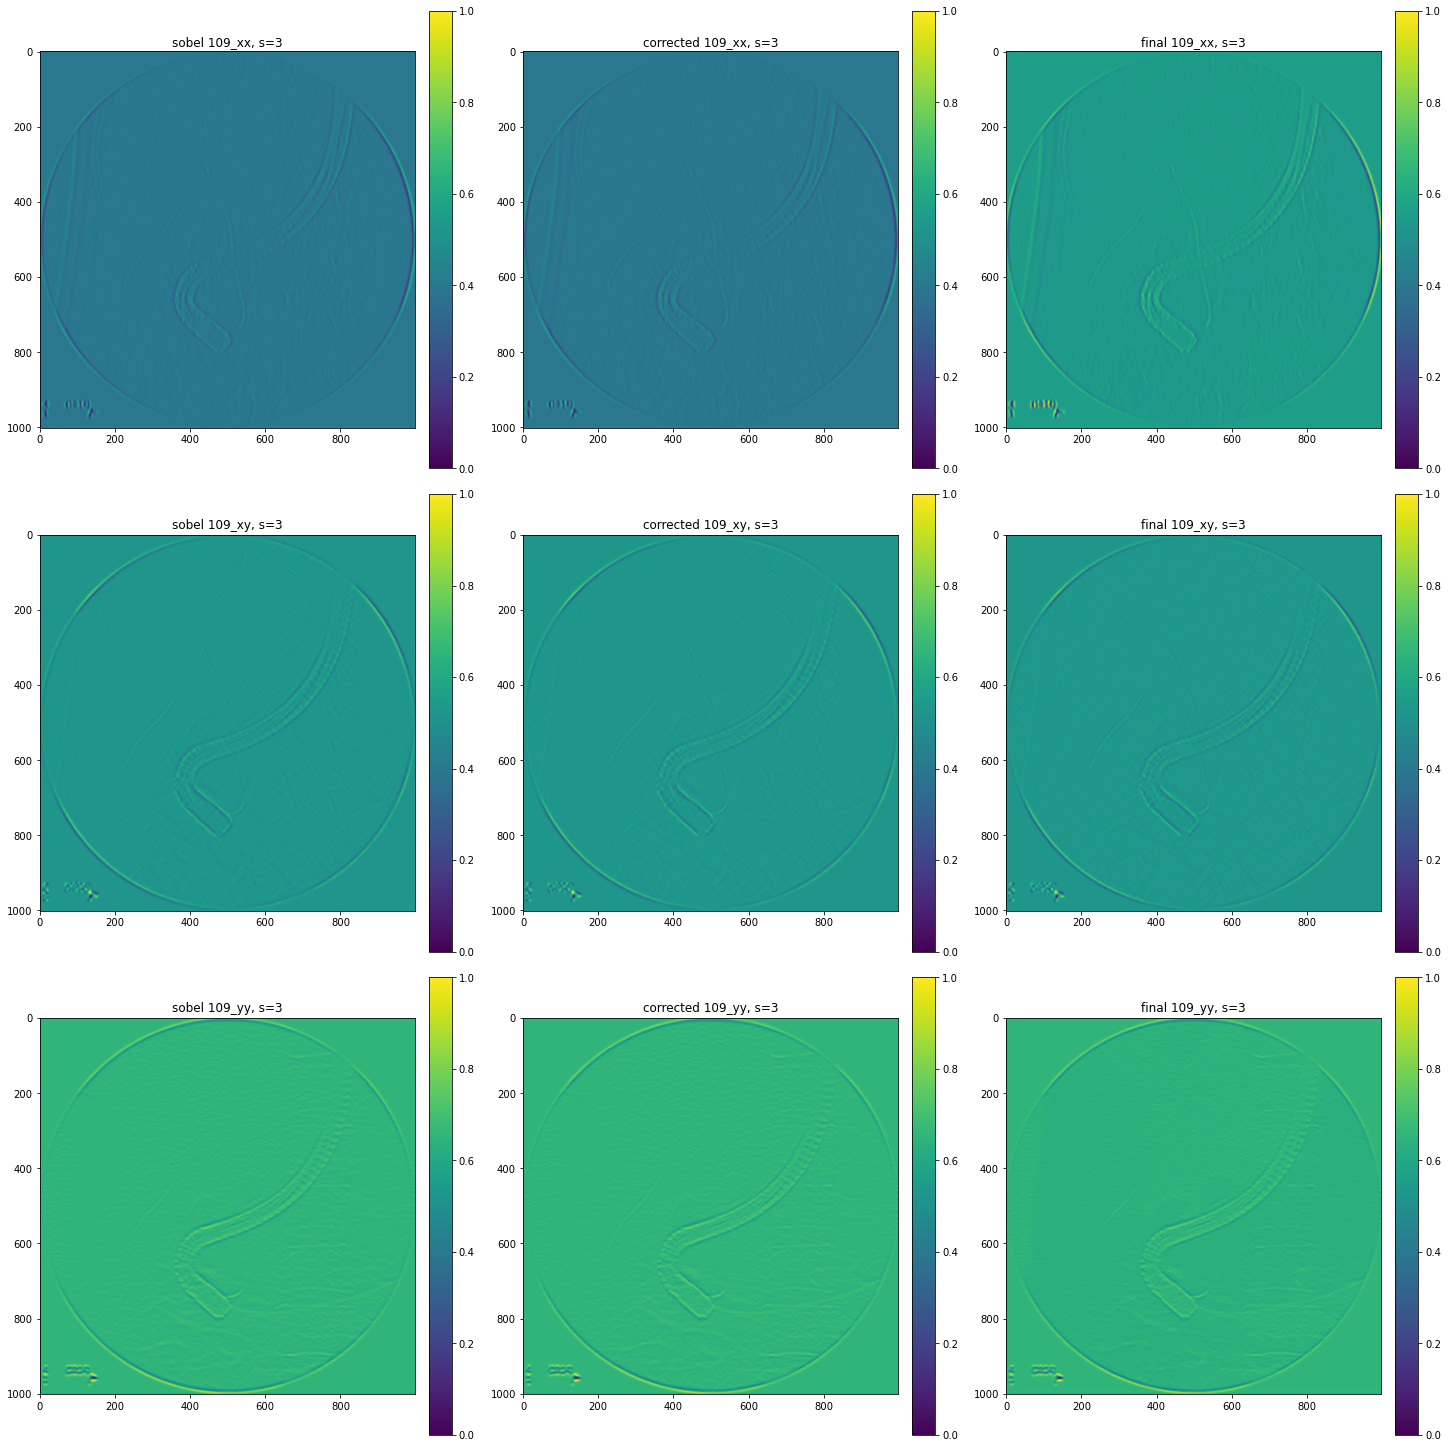

In [196]:
w,h=800,800
    
fig = plt.figure(constrained_layout=True,figsize=(w/40,h/40))
axs = fig.subplots(3, 3,sharex=False, sharey=False)
    
# with Sobel
axs[0][0].set_title("sobel 109_xx, s=3")
pos1 = axs[0][0].imshow(Ixx_109s_n)
fig.colorbar(pos1, ax=axs[0][0])


axs[0][1].set_title("corrected 109_xx, s=3")
pos2 = axs[0][1].imshow(Ixx_109c_n)
fig.colorbar(pos2, ax=axs[0][1])

axs[0][2].set_title("final 109_xx, s=3")
pos3 = axs[0][2].imshow(Ixx_109f_n)
fig.colorbar(pos3, ax=axs[0][2])

# corrected (simple)
axs[1][0].set_title("sobel 109_xy, s=3")
pos4 = axs[1][0].imshow(Ixy_109s_n)
fig.colorbar(pos4, ax=axs[1][0])

axs[1][1].set_title("corrected 109_xy, s=3")
pos5 = axs[1][1].imshow(Ixy_109c_n)
fig.colorbar(pos5, ax=axs[1][1])

axs[1][2].set_title("final 109_xy, s=3") 
pos6 = axs[1][2].imshow(Ixy_109f_n)
fig.colorbar(pos6, ax=axs[1][2])

# final 
axs[2][0].set_title("sobel 109_yy, s=3")
pos7 = axs[2][0].imshow(Iyy_109s_n)
fig.colorbar(pos7, ax=axs[2][0])

axs[2][1].set_title("corrected 109_yy, s=3")
pos8 = axs[2][1].imshow(Iyy_109c_n)
fig.colorbar(pos8, ax=axs[2][1])

axs[2][2].set_title("final 109_yy, s=3") 
pos9 = axs[2][2].imshow(Iyy_109f_n)
fig.colorbar(pos9, ax=axs[2][2])

In [197]:
vmin = 0.32
vmax = 0.68

Ixx_109s_nb = binarization(Ixx_109s_n, vmin, vmax)
Ixx_109c_nb = binarization(Ixx_109c_n, vmin, vmax)
Ixx_109f_nb = binarization(Ixx_109f_n, vmin, vmax)

Ixy_109s_nb = binarization(Ixy_109s_n, vmin, vmax)
Ixy_109c_nb = binarization(Ixy_109c_n, vmin, vmax)
Ixy_109f_nb = binarization(Ixy_109f_n, vmin, vmax)

Iyy_109s_nb = binarization(Iyy_109s_n, vmin, vmax)
Iyy_109c_nb = binarization(Iyy_109c_n, vmin, vmax)
Iyy_109f_nb = binarization(Iyy_109f_n, vmin, vmax)

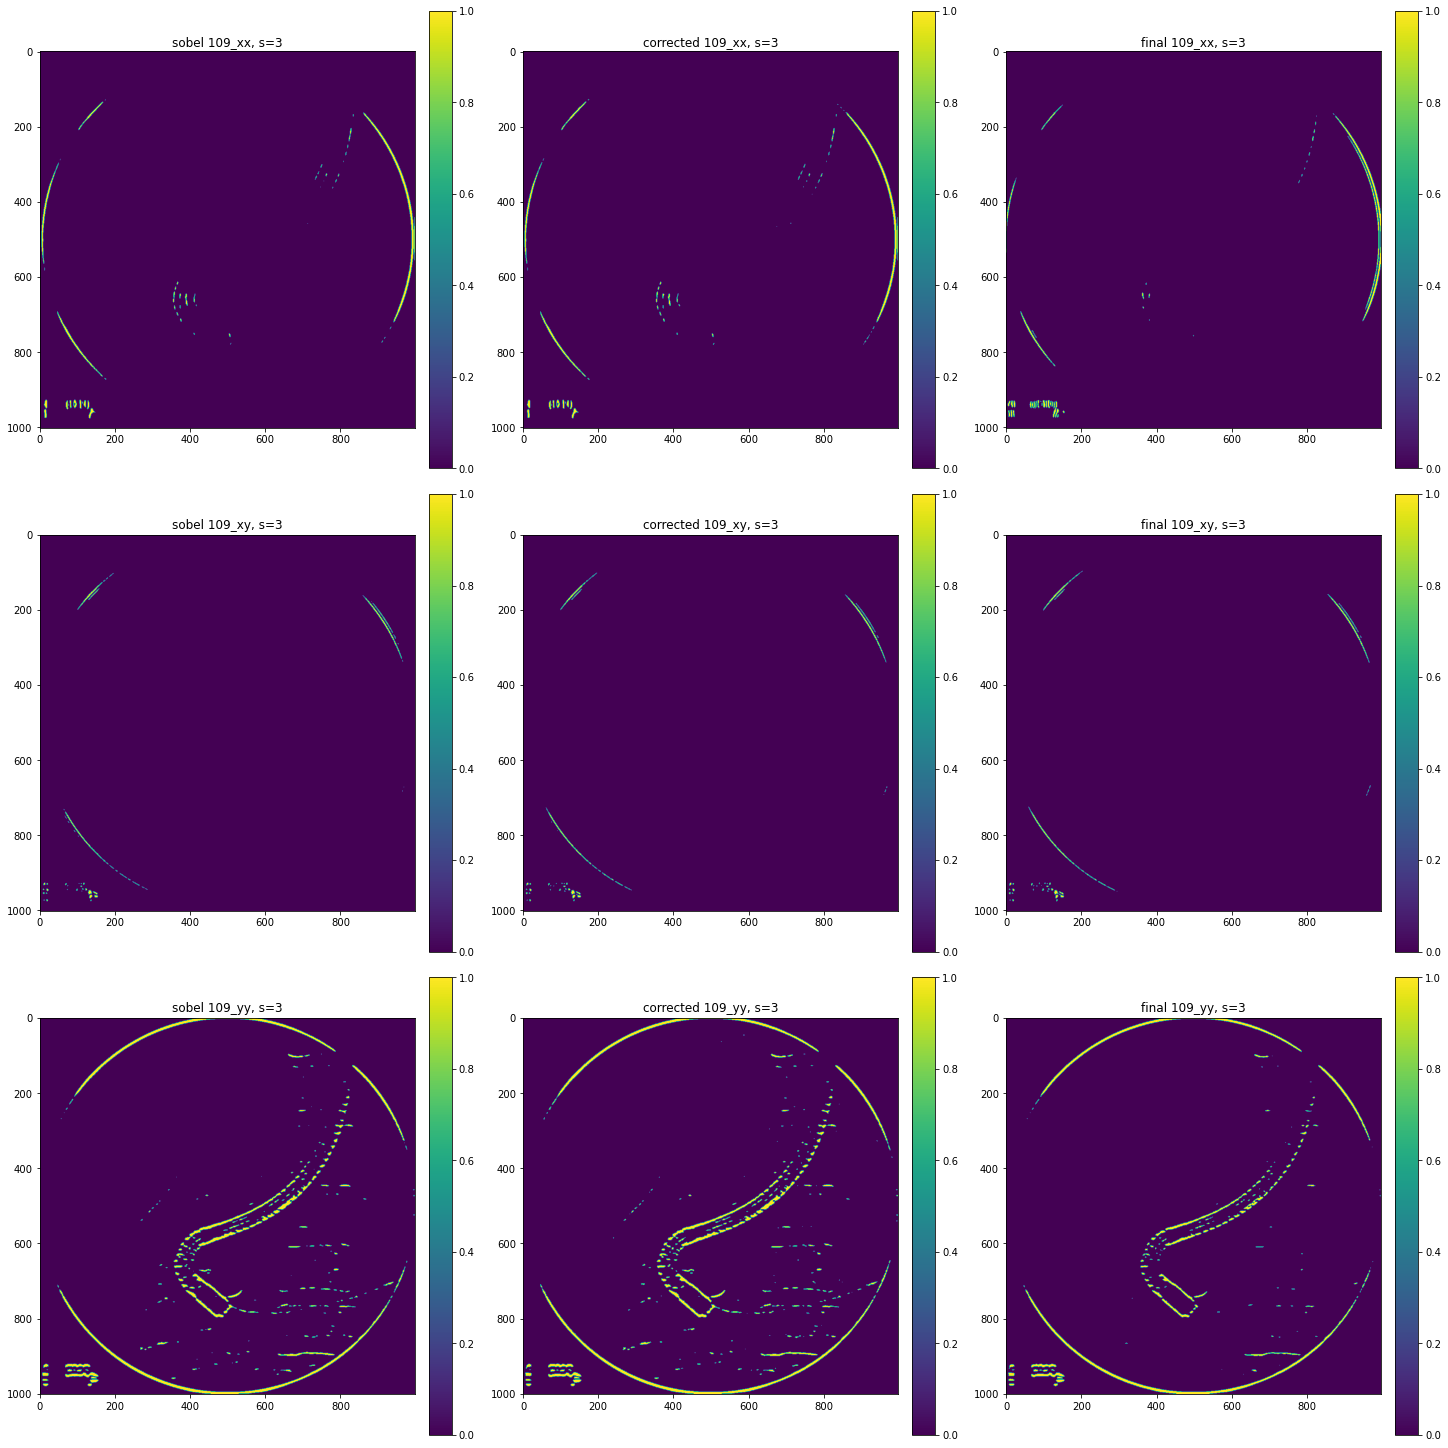

In [198]:
w,h=800,800
    
fig = plt.figure(constrained_layout=True,figsize=(w/40,h/40))
axs = fig.subplots(3, 3,sharex=False, sharey=False)
    
# with Sobel
axs[0][0].set_title("sobel 109_xx, s=3")
pos1 = axs[0][0].imshow(Ixx_109s_nb)
fig.colorbar(pos1, ax=axs[0][0])


axs[0][1].set_title("corrected 109_xx, s=3")
pos2 = axs[0][1].imshow(Ixx_109c_nb)
fig.colorbar(pos2, ax=axs[0][1])

axs[0][2].set_title("final 109_xx, s=3")
pos3 = axs[0][2].imshow(Ixx_109f_nb)
fig.colorbar(pos3, ax=axs[0][2])

# corrected (simple)
axs[1][0].set_title("sobel 109_xy, s=3")
pos4 = axs[1][0].imshow(Ixy_109s_nb)
fig.colorbar(pos4, ax=axs[1][0])

axs[1][1].set_title("corrected 109_xy, s=3")
pos5 = axs[1][1].imshow(Ixy_109c_nb)
fig.colorbar(pos5, ax=axs[1][1])

axs[1][2].set_title("final 109_xy, s=3") 
pos6 = axs[1][2].imshow(Ixy_109f_nb)
fig.colorbar(pos6, ax=axs[1][2])

# final 
axs[2][0].set_title("sobel 109_yy, s=3")
pos7 = axs[2][0].imshow(Iyy_109s_nb)
fig.colorbar(pos7, ax=axs[2][0])

axs[2][1].set_title("corrected 109_yy, s=3")
pos8 = axs[2][1].imshow(Iyy_109c_nb)
fig.colorbar(pos8, ax=axs[2][1])

axs[2][2].set_title("final 109_yy, s=3") 
pos9 = axs[2][2].imshow(Iyy_109f_nb)
fig.colorbar(pos9, ax=axs[2][2])

In [203]:
# differences between xx derivatives :
Ixx_c_s = Ixx_109c_nb - Ixx_109s_nb
Ixx_f_s = Ixx_109f_nb - Ixx_109s_nb
Ixx_f_c = Ixx_109f_nb - Ixx_109c_nb

# differences between xy derivatives :
Ixy_c_s = Ixy_109c_nb - Ixy_109s_nb
Ixy_f_s = Ixy_109f_nb - Ixy_109s_nb
Ixy_f_c = Ixy_109f_nb - Ixy_109c_nb

# differences between yy derivatives :
Iyy_c_s = Iyy_109c_nb - Iyy_109s_nb
Iyy_f_s = Iyy_109f_nb - Iyy_109s_nb
Iyy_f_c = Iyy_109f_nb - Iyy_109c_nb

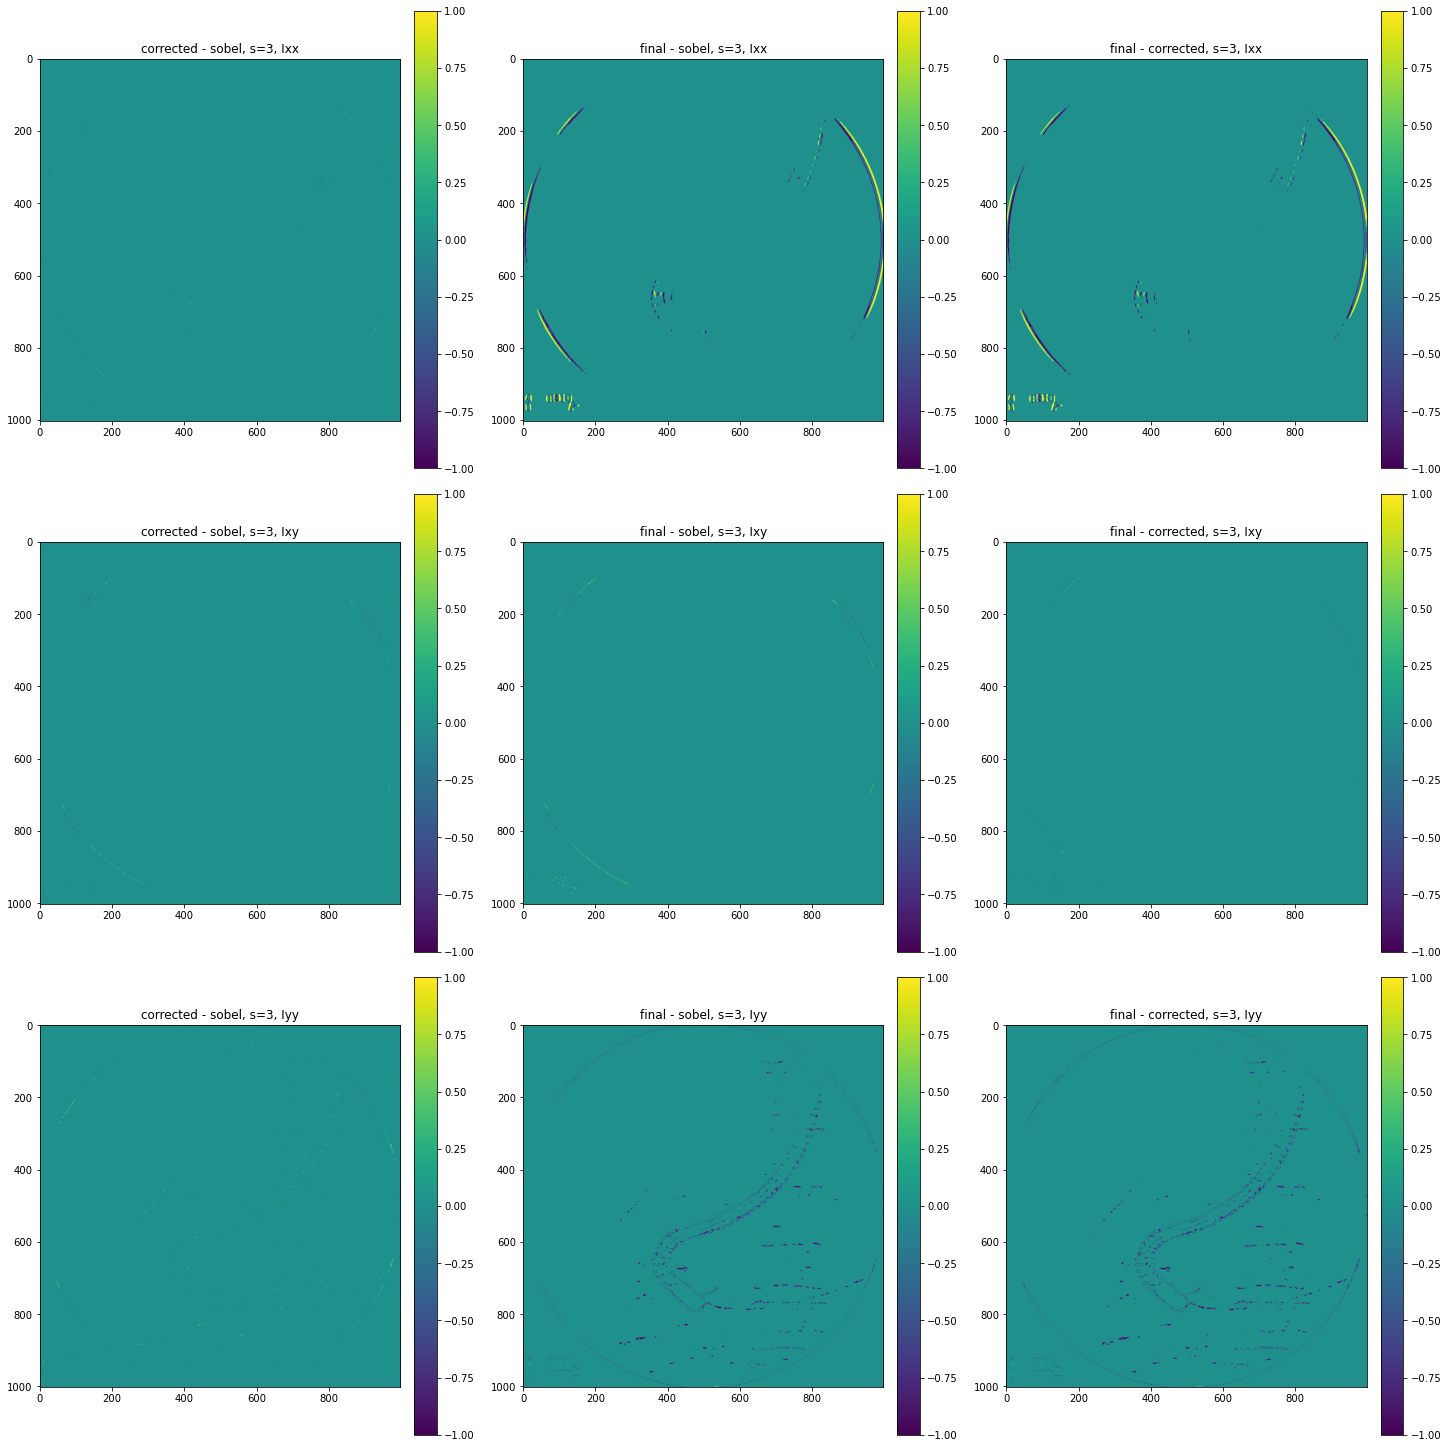

In [205]:
w,h=800,800
    
fig = plt.figure(constrained_layout=True,figsize=(w/40,h/40))
axs = fig.subplots(3, 3,sharex=False, sharey=False)

# differences between xx derivatives :
axs[0][0].set_title("corrected - sobel, s=3, Ixx")
pos1 = axs[0][0].imshow(Ixx_c_s)
fig.colorbar(pos1, ax=axs[0][0])

axs[0][1].set_title("final - sobel, s=3, Ixx")
pos1 = axs[0][1].imshow(Ixx_f_s)
fig.colorbar(pos1, ax=axs[0][1])

axs[0][2].set_title("final - corrected, s=3, Ixx")
pos1 = axs[0][2].imshow(Ixx_f_c)
fig.colorbar(pos1, ax=axs[0][2])

# differences between xy derivatives :
axs[1][0].set_title("corrected - sobel, s=3, Ixy")
pos1 = axs[1][0].imshow(Ixy_c_s)
fig.colorbar(pos1, ax=axs[1][0])

axs[1][1].set_title("final - sobel, s=3, Ixy")
pos1 = axs[1][1].imshow(Ixy_f_s)
fig.colorbar(pos1, ax=axs[1][1])

axs[1][2].set_title("final - corrected, s=3, Ixy") 
pos1 = axs[1][2].imshow(Ixy_f_c)
fig.colorbar(pos1, ax=axs[1][2])

# differences between yy derivatives :
axs[2][0].set_title("corrected - sobel, s=3, Iyy")
pos1 = axs[2][0].imshow(Iyy_c_s)
fig.colorbar(pos1, ax=axs[2][0])

axs[2][1].set_title("final - sobel, s=3, Iyy")
pos1 = axs[2][1].imshow(Iyy_f_s)
fig.colorbar(pos1, ax=axs[2][1])

axs[2][2].set_title("final - corrected, s=3, Iyy") 
pos1 = axs[2][2].imshow(Iyy_f_c)
fig.colorbar(pos1, ax=axs[2][2])

When we compare those results, we must keep in mind that the scale goes from -1 to 1 which correspond to a color scale from blue dark to yellow. Here we compare the filters two by two by doing a simple subtraction. So where the image is green, that means that both filters are equal. Where it is yellow, the first filter is better than the one we are subtracted. And when it is blue dark, it is the opposite : the second filter is better.
Here, we can see that there is not much differences between the Sobel and corrected filters. They are all green. On the last one, for the yy-derivative, we can see some yellow points here and there. Between these two, the corrected filter is slightly more efficient.
When we compare with the final filter, there are some edges that it detects more efficiently for the xy-derivative. And for the xx-derivative, we can also notice that for the same edges, there are some values more detected by final and some more detected by the two others : there are equivalent. But most importantly, there is a difference for the yy-derivative. There is a lot of blue dark on the image and it is located near the guidewire but also because of the noise. That means that both Sobel and the corrected version are more effective to dectect edges but they are also more affected by the noise.

In this project, there is a lot of noise in the images and the final version of the Hessian matrix is less afected by it while still capable of detecting the wire. For that reason, we'll chose to use this version.

##### NB : there are two convolution fonction define in the python packages : 
- scipy.ndimage.filters.convolve 
- scipy.signal.convolve2d 

After doing some research, we understand that the first one is faster to compute but the second one seems to respect more the strict definition of a convolution. For instance, the convolution of signal is commutative, whereas that of ndimage is not. And that is because the output depends on the fisrt argument given to the function.

# 

# Frangi & al.

### Computation of eigenvalues from a matrix :

How to compute eigenvalues of a matrix ?

By definition, an eigenvalue lambda of is matrix H defined by the equation HX = lambda x X where X is an eigenvector and X!=0. 

Thus we have HX - lambadaX = 0, that becomes (H-lambda x I)X = 0. 

From this equation and because we set X!=0, the matrix (H-lambda x I) is not inversible. 

Therefore, we have det(H-lambda x I) = 0.

det[[Ixx - lambda, Ixy], [Ixy, Iyy - lambda]] = 0

(Ixx - lambda) x (Iyy - lambda) - Ixy^2 = 0

Ixx x Iyy - Ixx x lambda - Iyy x lambda + lambda^2 - Ixy^2 = 0

lambda^2 - (Ixx + Iyy) x lambda + Ixx x Iyy - Ixy^2 = 0

lambda^2 - trace(H) x lambda + det(H) = 0

det_equation = det(lambda^2 - trace(H) x lambda + det(H)) = trace(H)^2 - 4 x 1 x det(H)

if det_equation < 0 : no solution

if det_equation = 0 : one solution and lambda = trace(H)/2 x 1 = 0.5 x trace(H)

if det_equation > 0 : two solutions and lambda1 = (trace(H) + sqrt(det_equation))/2 and lambda2 = (trace(H) - sqrt(det_equation))/2

In [158]:
def eigenvalues_frangi(image, scale) :
    """ Array[n, m]*float->Array[n,m,2]
        Compute the eigenvalues of the Hessian matrix of any pixel in an image and
        return a matrix containing those eigenvalues sorted by their absolute value
    """
    dim = image.shape
    # getting the Hessian matrix
    Ixx, Ixy, Iyy = hessian_matrix_final(image,scale)
    
    matrix = np.zeros((dim[0],dim[1],2))
    
    # computation of trace and determinant of the hessian matrix
    T = Ixx + Iyy
    D = Ixx*Iyy - Ixy**2
    
    # compute of the eigenvalues for each pixel
    # By the quadratic formula, we resolve the equation (det(H-lambda*I) = 0)
    det_equation = T**2 - 4*D
    
    # the det_equation matrix shouldn't have any numbers under < 0 but it can occurs here because of the use of float
    # So if it happens, the number will be negative but really close to zero : we will simply put it at zero
    if det_equation.min() < 0 :
        det_equation = np.where(det_equation<0, 0, det_equation)
        
    tmp = np.sqrt(det_equation)
    lambda1 = (T + tmp) / 2
    lambda2 = (T - tmp) / 2
    
    # sorted eigenvalues by their absolute values
    lambda1_sorted = np.where(np.abs(lambda1)<=np.abs(lambda2), lambda1, lambda2)
    lambda2_sorted = np.where(lambda1==lambda1_sorted, lambda2, lambda1)
    
    matrix[:,:,0] = lambda1_sorted
    matrix[:,:,1] = lambda2_sorted
    
    return matrix
    

### The measures from the eigenvalues of each pixel

In [135]:
def frangi_measures(image, scale, matrix_ev) :
    """ Array[n, m]*float->Array[n,m,2]
        return the measures needed for the Frangi filter
    """
    dim = image.shape
    matrix_m = np.zeros(matrix_ev.shape)
    
    for x in range(dim[0]) :
        for y in range(dim[1]) :
            # getting the eigenvalues of the pixel (i,j)
            y1 = matrix_ev[x,y,0]
            y2 = matrix_ev[x,y,1]
            # calculating the measures needed for this pixel
            if y2 == 0 :
                Rb = 0
            else : 
                Rb = y1 / y2
            S = np.sqrt(y1**2 + y2**2)
            # assigning those measures to a matrix
            matrix_m[x,y,0] = Rb
            matrix_m[x,y,1] = S
    
    return matrix_m

In [136]:
def frangi_measures2(image, scale) :
    """ Array[n, m]*float->Array[n,m,2]
        return the measures needed for the Frangi filter
    """
    dim = image.shape
    matrix_ev = eigenvalues_frangi(image,scale)
    return frangi_measures(image, scale, matrix_ev)

In [138]:
ev_109 = eigenvalues_frangi(test_img_109, 5)
fm_109 = frangi_measures(test_img_109,5,ev_109)
print(fm_109)

[[[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 ...

 [[-0.49927554  0.43462768]
  [ 0.17459917  1.19442399]
  [ 0.27781415  0.24188519]
  ...
  [ 0.27781415  0.24188519]
  [ 0.17459917  1.19442399]
  [-0.49927554  0.43462768]]

 [[-0.26629464  1.47413296]
  [ 0.72989687  2.01929422]
  [ 0.03730015  1.82692181]
  ...
  [ 0.03730015  1.82692181]
  [ 0.72989687  2.01929422]
  [-0.26629464  1.47413296]]

 [[-0.77863532  2.21029399]
  [-0.10181257  1.27983326]
  [-0.87777235  0.50022828]
  ...
  [-0.87777235  0.500228

In [139]:
print(fm_109[:,:,1])
print(np.max(fm_109[:,:,1]))

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.43462768 1.19442399 0.24188519 ... 0.24188519 1.19442399 0.43462768]
 [1.47413296 2.01929422 1.82692181 ... 1.82692181 2.01929422 1.47413296]
 [2.21029399 1.27983326 0.50022828 ... 0.50022828 1.27983326 2.21029399]]
52.712634004010404


### The calculated fonction for each pixel

In [288]:
def frangi_function(image, scale, gamma=1, beta=0.5, black_ridges=True, choseGamma=False) :
    """ Array[n, m]*float*float*float*bool*bool->Array[n,m]
        return the value of the frangi fonction for each pixel
    """
    dim = image.shape
    matrix_ev = eigenvalues_frangi(image,scale)
    matrix_m = frangi_measures(image,scale, matrix_ev)
    
    if not choseGamma :
        # good estimation of gamma according to the article
        gamma = np.max(matrix_m[:,:,1])/2
    
    # initialisation
    matrix_f = np.zeros(dim)
    
    for x in range(dim[0]) :
        for y in range(dim[1]) :
            
            # In the dataset, all the guidewires to detect are dark on bright images
            # As specify in the 1998 Frangi article, we then inverse the conditions
            if (black_ridges) :
                if matrix_ev[x,y,1] <= 0 :
                    f = 0
                else :
                    e1 = np.exp( (-(matrix_m[x,y,0]**2)) / (2* (beta**2)) )
                    e2 = np.exp( (-(matrix_m[x,y,1]**2)) / (2* (gamma**2)) )
                    f = e1 * (1-e2)
                matrix_f[x,y] = f
            
            else :
                if matrix_ev[x,y,1] > 0 :
                    f = 0
                else :
                    e1 = np.exp( (-(matrix_m[x,y,0]**2)) / (2* (beta**2)) )
                    e2 = np.exp( (-(matrix_m[x,y,1]**2)) / (2* (gamma**2)) )
                    f = e1 * (1-e2)
                matrix_f[x,y] = f
            
    return matrix_f

### Calculation of the gamma parameter

In [148]:
def gamma(image,scale) :
    """ Array[n,m]*float->float
        return a correct value to give to the gamma parameter
    """
    matrix_m = frangi_measures2(image,scale)
    
    return np.max(matrix_m[:,:,1])/2

### Multiscale filter response

In [285]:
def multiscale_Frangi(image, scales, gamma=1, beta=0.5, black_ridges=True, choseGamma=False) :
    filtered_final = np.zeros((image.shape[0],image.shape[1],len(scales)))
    res = np.zeros(image.shape)
    
    for i in range(len(scales)) :
        filtered_image_s = frangi_function(image, scales[i], gamma, beta, black_ridges, choseGamma)
        filtered_final[:,:,i] = filtered_image_s
        
    for i in range(image.shape[0]) :
        for j in range(image.shape[1]) :
            res[i,j] = np.max(filtered_final[i,j,:])
            
    return res

## Frangi tests

#### eigenvalues 
compared to another code found on github, correct (changing the fonction hessian_matrix by mine, we can compare the results and they are the same)

In [32]:
def eig2image(image, scale):
    """
    This function eig2image calculates the eigen values from the
    hessian matrix, sorted by abs value. And gives the direction
    of the ridge (eigenvector smallest eigenvalue) .
    | Dxx  Dxy |
    | Dxy  Dyy |
    """
    ### Test pour la matrice hessienne
    # lambda1, lambda2
    #Dxx, Dxy, Dyy = hessian_matrix_sobel(image,scale)
    # lambda1bis, lambda2bis
    #Dxx, Dxy, Dyy = hessian_matrix_corrected(image,scale)
    # lambda1ter, lambda2ter
    Dxx, Dxy, Dyy = hessian_matrix_final(image,scale)
    
    # Compute the eigenvectors of J, v1 and v2
    tmp = np.sqrt((Dxx - Dyy)**2 + 4*Dxy**2)
    v2x = 2*Dxy
    v2y = Dyy - Dxx + tmp

    # Normalize
    mag = np.sqrt(v2x**2 + v2y**2)
    i = np.invert(np.isclose(mag, np.zeros(mag.shape)))
    v2x[i] = v2x[i]/mag[i]
    v2y[i] = v2y[i]/mag[i]

    # The eigenvectors are orthogonal
    v1x = -v2y.copy()
    v1y = v2x.copy()

    # Compute the eigenvalues
    mu1 = 0.5*(Dxx + Dyy + tmp)
    mu2 = 0.5*(Dxx + Dyy - tmp)

    # Sort eigenvalues by absolute value abs(Lambda1)<abs(Lambda2)
    check = np.absolute(mu1) > np.absolute(mu2)

    Lambda1 = mu1.copy()
    Lambda1[check] = mu2[check]
    Lambda2 = mu2.copy()
    Lambda2[check] = mu1[check]

    Ix = v1x.copy()
    Ix[check] = v2x[check]
    Iy = v1y.copy()
    Iy[check] = v2y[check]

    return Lambda1, Lambda2, Ix, Iy

In [34]:
eig_m = eigenvalues_frangi(test_img_109, 5)

lambda1, lambda2, _, _ = eig2image(test_img_109,5)

eig_m2 = np.zeros((lambda1.shape[0], lambda1.shape[1], 2))
eig_m2[:,:,0] = lambda1
eig_m2[:,:,1] = lambda2

#print(eig_m)
#print(eig_m2)
print("Both matrix resulting from the two functions are alike :")
print(np.allclose(eig_m, eig_m2))

Both matrix resulting from the two functions are alike :
True


The two functions give the same results : it works !

#### gamma function tests with different image and different scale

In [159]:
gamma_109_5 = gamma(test_img_109, 5)
print(gamma_109_5)
gamma_108_5 = gamma(test_img_108, 5)
print(gamma_108_5)

2.1434376534341366
1.3016604505580482


In [161]:
gamma_109_3 = gamma(test_img_109, 3)
print(gamma_109_3)
gamma_108_3 = gamma(test_img_108, 3)
print(gamma_108_3)

5.851681193211094
4.143138954840658


#### frangi_function test with two different images (and the previous calculated gamma)

In [162]:
filtered_frangi_img109 = frangi_function(test_img_109,3,gamma_109_3)

Text(0.5, 1.0, 'annotation')

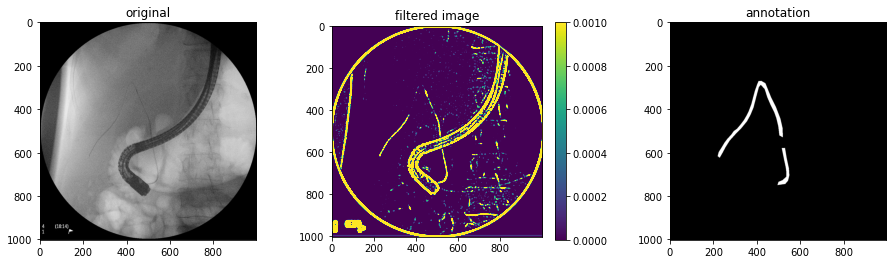

In [283]:
fig = plt.figure(figsize=plt.figaspect(0.25))
axs = fig.subplots(1, 3,sharex=False, sharey=False)
    
axs[0].set_title("original")
axs[0].imshow(test_img_109,cmap="gray")

axs[1].set_title("filtered image")
pos2 = axs[1].imshow(filtered_frangi_img109, vmin=0, vmax=0.001)
fig.colorbar(pos2, ax=axs[1])

axs[2].imshow(annot109,cmap="gray")
axs[2].set_title("annotation")

In [164]:
multi_frangi_109 = multiscale_Frangi(test_img_109, [3.,3.2,3.4,3.6,3.8,4.], 0)

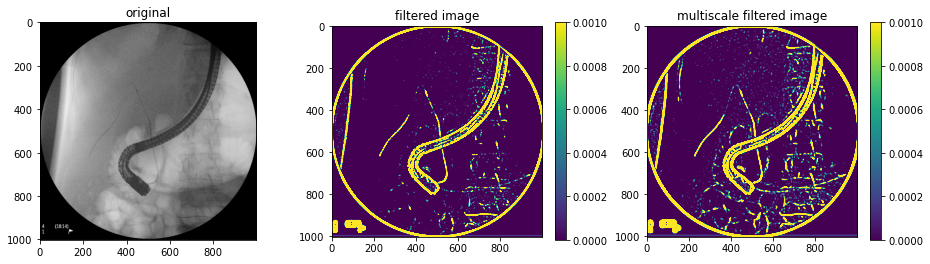

In [252]:
fig = plt.figure(figsize=plt.figaspect(0.25))
axs = fig.subplots(1, 3,sharex=False, sharey=False)
    
axs[0].imshow(test_img_109,cmap="gray")
axs[0].set_title("original")

axs[1].set_title("filtered image")
pos2 = axs[1].imshow(filtered_frangi_img109, vmin=0, vmax=0.001)
fig.colorbar(pos2, ax=axs[1])

axs[2].set_title("multiscale filtered image")
pos3 = axs[2].imshow(multi_frangi_109, vmin=0, vmax=0.001)
fig.colorbar(pos3, ax=axs[2])

The multiscale thing is used for vesselness filters applied to vessels especially blood ones because they have lots of bifurcation and different dimensions. But here, the wire is the only thing that interests us and it only has one specific dimension so computing a multiscale approach is useless for this study : we will focus on trying to find the best scale s that allows us to see the wire without too much noise.

#### comparaison of the results between my functions for frangi and skimage frangi filter

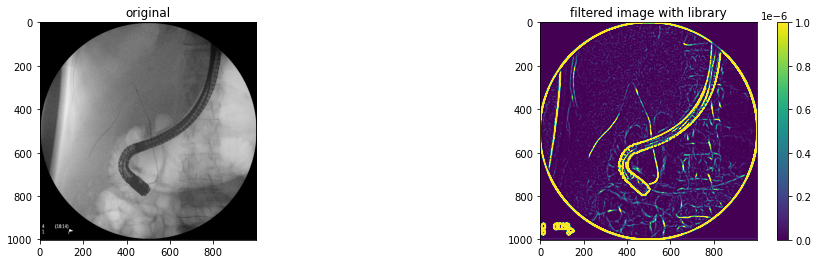

In [244]:
fig = plt.figure(figsize=plt.figaspect(0.25))
axs = fig.subplots(1, 2,sharex=False, sharey=False)

axs[0].imshow(test_img_109,cmap="gray")
axs[0].set_title("original")

axs[1].set_title("filtered image with library")
pos2 = axs[1].imshow(skimage.filters.frangi(test_img_109, sigmas=[3]), vmin=0, vmax=0.000001)
fig.colorbar(pos2, ax=axs[1])

For the same scale (s = 3), our filter have higher values almost everywhere. For a similar visual result, we must show the values from 0 to 0.001 for our filter and from 0 to only 1.e-6 for the existing Frangi filter.

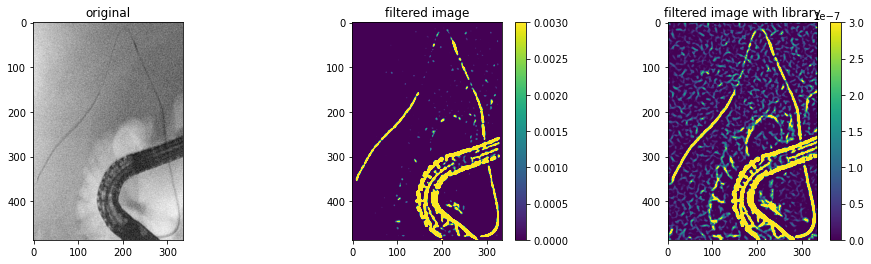

In [302]:
fig = plt.figure(figsize=plt.figaspect(0.25))
axs = fig.subplots(1, 3,sharex=False, sharey=False)

high_109, low_109, left_109, right_109 = wire_zone(annot109)
zone_109 = test_img_109[high_109:low_109, left_109:right_109]
    
axs[0].imshow(zone_109,cmap="gray")
axs[0].set_title("original")

filtered_zone_frangi_img109 = frangi_function(zone_109,3)

axs[1].set_title("filtered image")
pos2 = axs[1].imshow(filtered_zone_frangi_img109, vmax=0.003)
fig.colorbar(pos2, ax=axs[1])

axs[2].set_title("filtered image with library")
pos3 = axs[2].imshow(skimage.filters.frangi(zone_109, sigmas=[3]), vmax=3e-7)
fig.colorbar(pos3, ax=axs[2])

Modification on the scale color was necessary to better see the results for the wire (the values of the catheter's pixels are too high and it hides those of the wire). But the results are pretty much alike except for a 10(-4) factor between them. The existing Frangi filter gives a smoothen result so we can see all the wire even if there is a lot of noise. Our implementation of the filter is way less affected by the noise but we can't see the full wire.

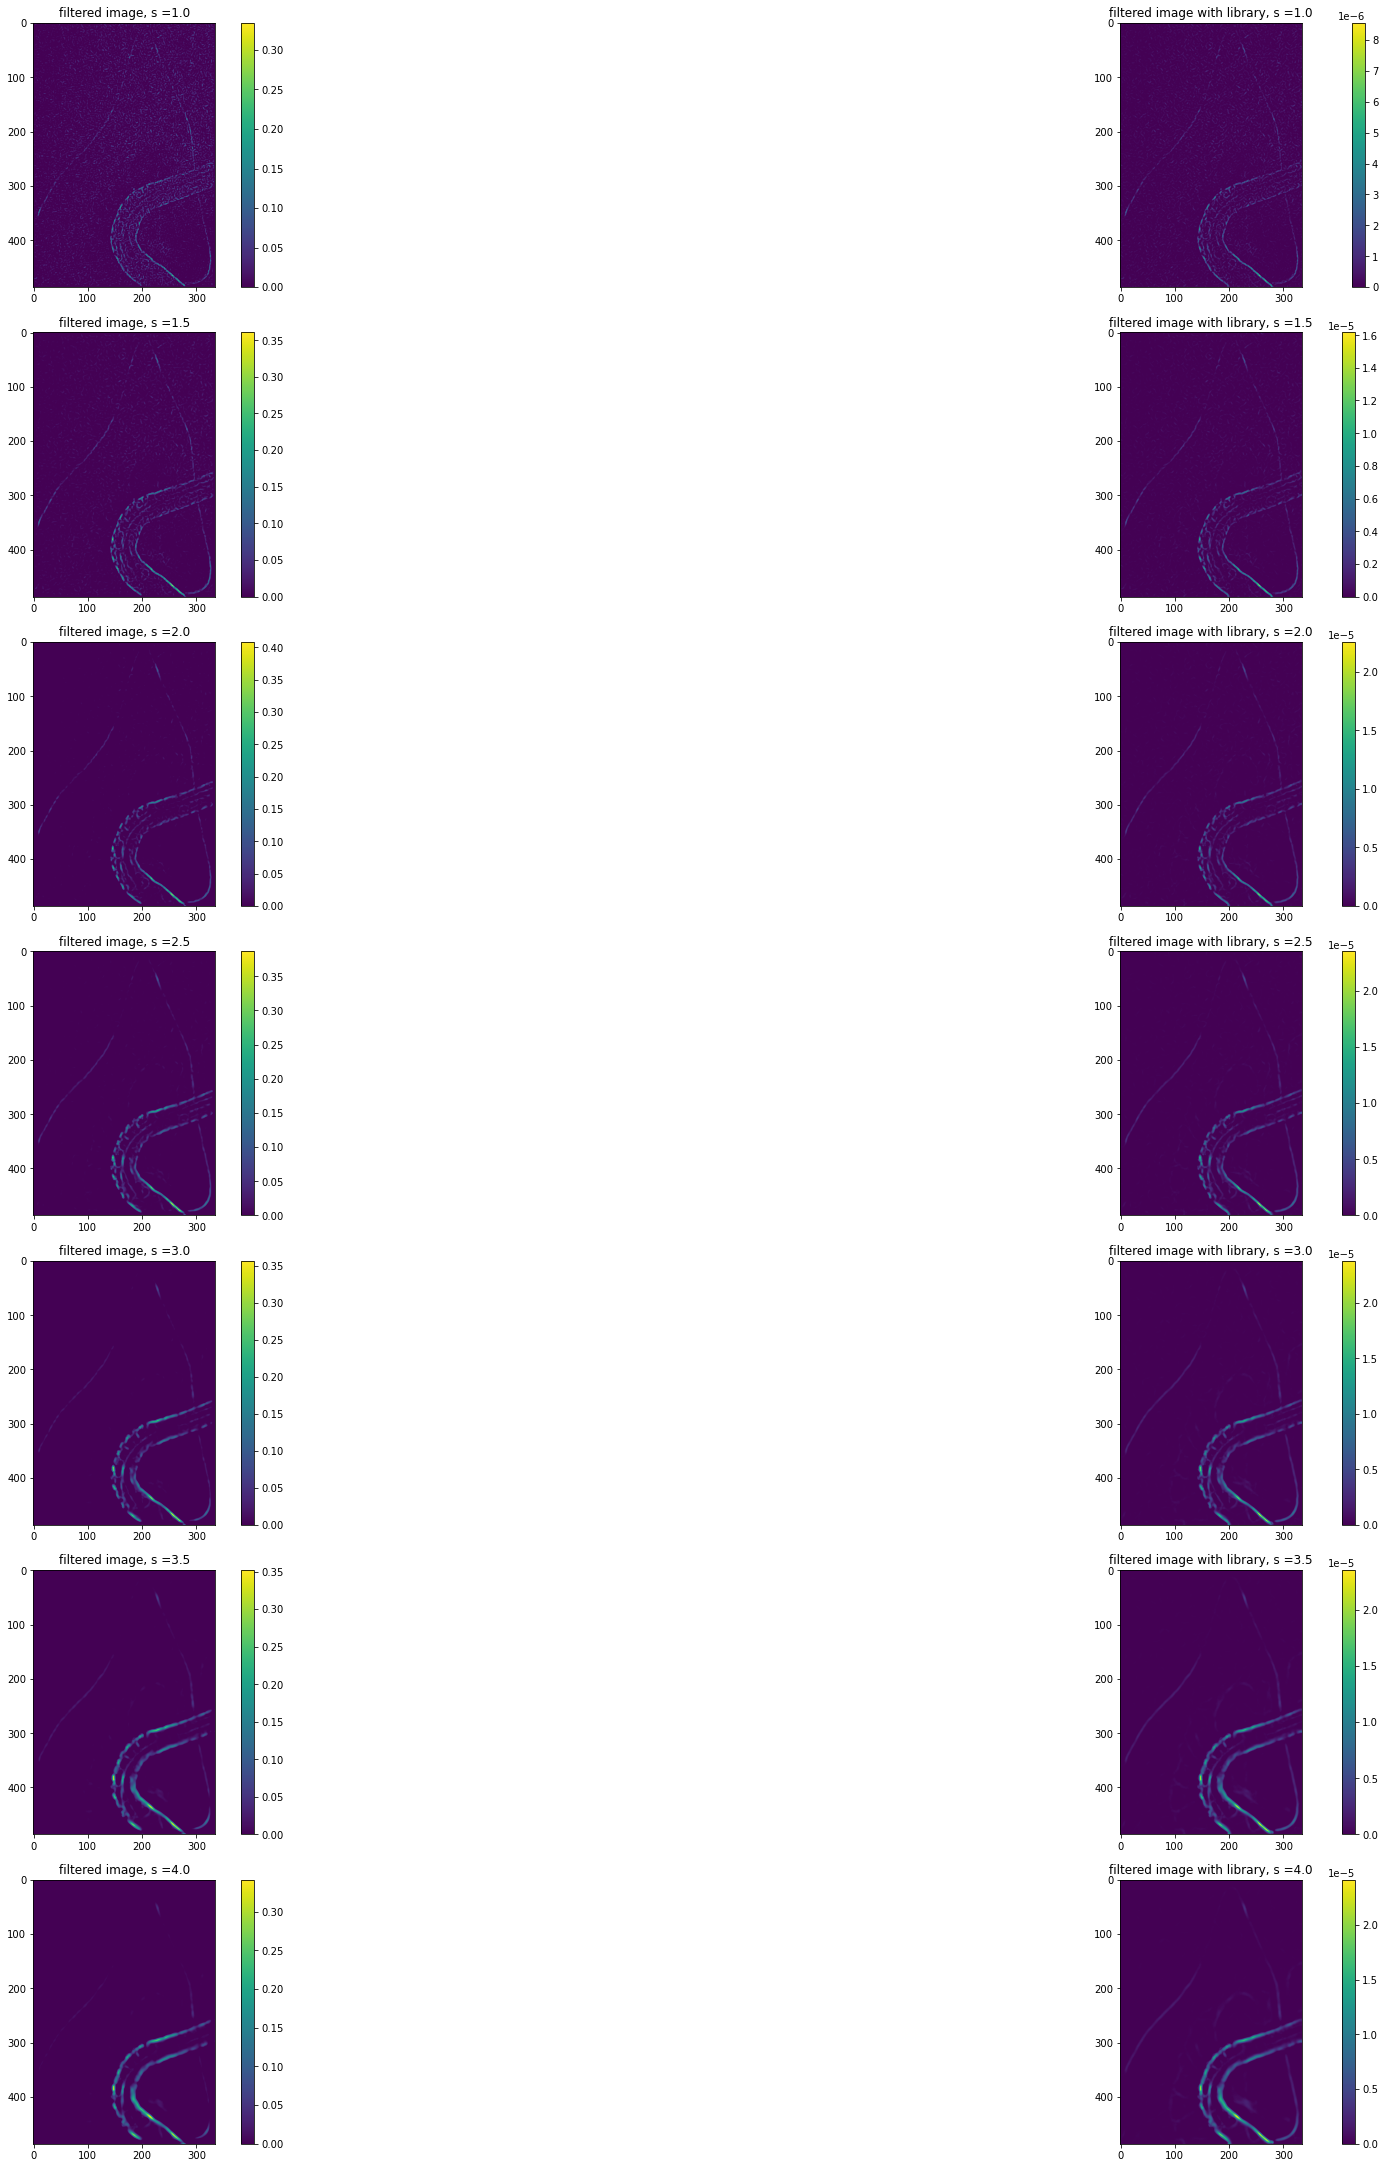

In [330]:
fig = plt.figure(constrained_layout=True,figsize=(30,30))
axs = fig.subplots(7, 2,sharex=False, sharey=False)

scales = [1.0,1.5,2.0,2.5,3.0,3.5,4.0]
tab_vmax = []

for i in range(7) :
    
    high_109, low_109, left_109, right_109 = wire_zone(annot109)
    zone_109 = test_img_109[high_109:low_109, left_109:right_109]

    filtered_zone_frangi_img109 = frangi_function(zone_109,scales[i])
    
    title1 = "filtered image, s =" + str(scales[i])
    axs[i][0].set_title(title1)
    pos2 = axs[i][0].imshow(filtered_zone_frangi_img109)
    fig.colorbar(pos2, ax=axs[i][0])

    title2 = "filtered image with library, s =" + str(scales[i])
    axs[i][1].set_title(title2)
    pos3 = axs[i][1].imshow(skimage.filters.frangi(zone_109, sigmas=[scales[i]]))
    fig.colorbar(pos3, ax=axs[i][1])

#### image 108

In [305]:
filtered_frangi_img108 = frangi_function(test_img_108,3)

Text(0.5, 1.0, 'annotation')

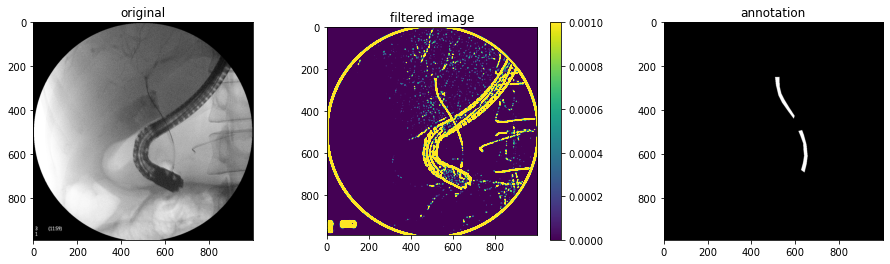

In [306]:
fig = plt.figure(figsize=plt.figaspect(0.25))
axs = fig.subplots(1, 3,sharex=False, sharey=False)
    
axs[0].set_title("original")
axs[0].imshow(test_img_108,cmap="gray")

axs[1].set_title("filtered image")
pos2 = axs[1].imshow(filtered_frangi_img108, vmin=0, vmax=0.001)
fig.colorbar(pos2, ax=axs[1])

axs[2].imshow(annot108,cmap="gray")
axs[2].set_title("annotation")

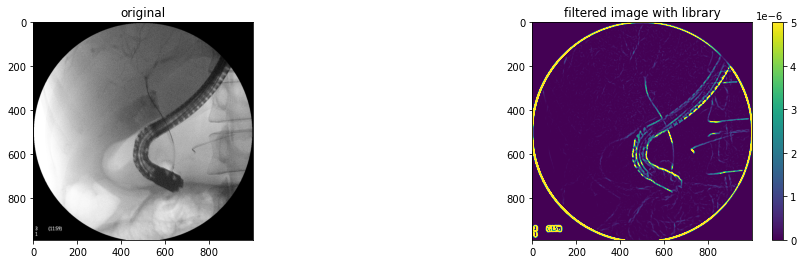

In [307]:
fig = plt.figure(figsize=plt.figaspect(0.25))
axs = fig.subplots(1, 2,sharex=False, sharey=False)

axs[0].imshow(test_img_108,cmap="gray")
axs[0].set_title("original")

axs[1].set_title("filtered image with library")
pos2 = axs[1].imshow(skimage.filters.frangi(test_img_108, sigmas=[3]), vmin=0, vmax=5.e-6)
fig.colorbar(pos2, ax=axs[1])

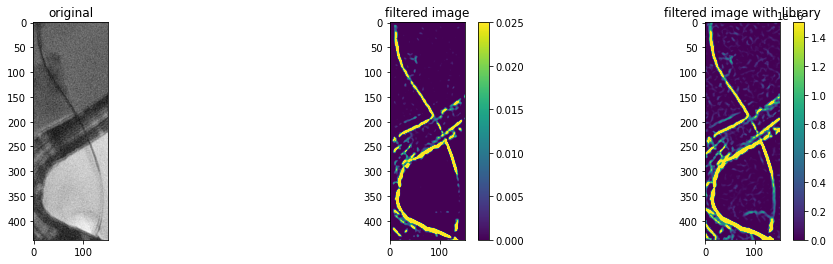

In [314]:
fig = plt.figure(figsize=plt.figaspect(0.25))
axs = fig.subplots(1, 3,sharex=False, sharey=False)

high_108, low_108, left_108, right_108 = wire_zone(annot108)
zone_108 = test_img_108[high_108:low_108, left_108:right_108]
    
axs[0].imshow(zone_108,cmap="gray")
axs[0].set_title("original")

filtered_zone_frangi_img108 = frangi_function(zone_108,3)

axs[1].set_title("filtered image")
pos2 = axs[1].imshow(filtered_zone_frangi_img108, vmax=0.025)
fig.colorbar(pos2, ax=axs[1])

axs[2].set_title("filtered image with library")
pos3 = axs[2].imshow(skimage.filters.frangi(zone_108, sigmas=[3]), vmax=0.15e-5)
fig.colorbar(pos3, ax=axs[2])

### test on every image

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.25))
axs = fig.subplots(16, 3,sharex=False, sharey=False)

for i in range(16) :
    num = nums_images[i]
    
    link_annot = 'images/annotations/' + num + '.jpg'
    annot = np.array(Image.open(link_annot))[:,:,0]
    link_img = 'images/images/' + num + '.jpg'
    test_img = np.array(Image.open(link_img))[:,:,0]
    
    axs[i][0].imshow(zone,cmap="gray")
    axs[i][0].set_title("original", num)
    
    high, low, left, right = wire_zone(annot)
    zone = test_img[high:low, left:right]
    
    filtered_zone_frangi = frangi_function(zone,3)

# 

# Jerman & al.

### Computing eigenvalues from a matrix

In [17]:
def eigenvalues_jerman(image, scale, black_ridges=True) :
    """ Array[n, m]*float*bool->Array[n,m,2]
        Compute the eigenvalues of the Hessian matrix of any pixel in an image and
        return a matrix containing those eigenvalues sorted by their absolute value
    """
    
    if not black_ridges :
        return -eigenvalues_frangi(image,scale)
    else :
        return eigenvalues_frangi(image, scale)

### Computing lambda_p

In [18]:
def lambda_p2(image, scale, tau, matrix_ev, black_ridges=True) :
    """ Array[n, m]*float*float*bool->Array[n,m]
        Compute the lambda_p parameter that replace lambda3 in 3D
    """
    
    # In 2D, we assume lambda3 = lambda2 (lambda3 is a third eigenvalue for 3D)
    lambda3 = matrix_ev[:,:,1]
    
    # computation of lambda_p
    max_l3 = np.max(lambda3)
    
    lambda_p_tmp = np.where(lambda3>tau*max_l3, lambda3, tau*max_l3)
    lambda_p = np.where(lambda3<=0, 0, lambda_p_tmp)
    
    return lambda_p

In [19]:
def lambda_p(image, scale, tau, black_ridges=True) :
    """ Array[n, m]*float*float*bool->Array[n,m]
        Compute the lambda_p parameter that replace lambda3 in 3D
    """
    matrix_ev = eigenvalues_jerman(image, scale, black_ridges)
    
    return lambda_p2(image, scale, tau, matrix_ev, black_ridges)

### The calculated function for each pixel

In [20]:
def jerman_function(image, scale, tau, black_ridges=True) :
    """ Array[n, m]*float*float*bool->Array[n,m]
        return the value of the frangi fonction for each pixel
    """
    
    if (tau < 0) or (tau > 1) :
        print("Warning ! Tau must be between 0 and 1 !")
    
    # initialisation
    matrix_ev = eigenvalues_jerman(image, scale, black_ridges)
    lambda2 = matrix_ev[:,:,1]
    l_p = lambda_p2(image, scale, tau, matrix_ev, black_ridges)
    
    dim = image.shape
    matrix_f = np.zeros(dim)
    
    for i in range(dim[0]) :
        for j in range(dim[1]) :
            if ( (l_p[i,j]<=0) or (lambda2[i,j]<=0) ) :
                matrix_f[i,j] = 0
                
            elif ( (lambda2[i,j]>=0.5*l_p[i,j]) and (0.5*l_p[i,j] > 0) ) :
                matrix_f[i,j] = 1
                
            elif (lambda2[i,j] + l_p[i,j] == 0) :
                matrix_f[i,j] = 0
            
            else :
                matrix_f[i,j] = lambda2[i,j]**2 * (l_p[i,j] - lambda2[i,j]) * (3/(lambda2[i,j]+l_p[i,j]))**3

    
    return matrix_f
    

In [21]:
def multiscale_Jerman(image, scales, tau, black_ridges=True) :
    filtered_final = np.zeros((image.shape[0],image.shape[1],len(scales)))
    res = np.zeros(image.shape)
    
    for i in range(len(scales)) :
        filtered_image_s = jerman_function(image, scales[i], tau, black_ridges)
        filtered_final[:,:,i] = filtered_image_s
        
    for i in range(image.shape[0]) :
        for j in range(image.shape[1]) :
            res[i,j] = np.max(filtered_final[i,j,:])
            
    return res

### Mean-C thresholding

In [23]:
def mean_C_thresh(image, C) :
    """ Array[n, m] * float -> Array[n, m]
        return the thresholding by C of the image convolved with a mean kernel
    """
    mean_kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
    mean_image = scipy.signal.convolve2d(image,mean_kernel,mode='same')
    
    return threshold(mean_image, C)

#### Additional functions tested but not efficient

In [24]:
m = np.array([[1,2,3],[4,5,6],[7,8,9]])
i = 1
j = 1
haut = m[i-1:i+1+1,j-1]
bas = m[i-1:i+1+1,j+1]
print(np.concatenate((haut,bas,[m[i-1,j],m[i+1,j]]),axis=0))

[1 4 7 3 6 9 2 8]


In [25]:
def hysteresis_threshold(matrix, S1, S2) :
    
    dim = matrix.shape
    matrix_tmp = imagePad(matrix.copy(),1)
    first_thr = threshold(matrix.copy(),S1)
    thr_tmp = imagePad(first_thr.copy(),1)

    res = matrix_tmp.copy()
    
    for i in range(1,dim[0]+1):
        for j in range(1,dim[1]+1):
            
            # neighboring of 8 in the first 
            left = thr_tmp[i-1:i+1+1,j-1]
            right = thr_tmp[i-1:i+1+1,j+1]
            up_down = [thr_tmp[i-1,j],thr_tmp[i+1,j]]
            window_thr = np.concatenate((left, right, up_down), axis=0)
            
            
            left2 = thr_tmp[i-1:i+1+1,j-1]
            right2 = thr_tmp[i-1:i+1+1,j+1]
            up_down2 = [thr_tmp[i-1,j],thr_tmp[i+1,j]]
            window_res = np.concatenate((left2, right2, up_down2), axis=0)
                
            
            if (matrix_tmp[i,j] > S2) and (np.sum(window_thr) > S1) :
                res[i,j] = matrix_tmp[i,j]
            else :
                res[i,j] = 0
                
    return res[1:-1,1:-1]
            

### Tests Jerman

#### Tests of the Jerman filter and the different threshold functions 

In [26]:
filtered_img109_jerman = jerman_function(test_img_109, 3, 0.5)
threshold_img109_jerman = threshold(filtered_img109_jerman,0.05)
threshold2_img109_jerman = threshold(filtered_img109_jerman,0.2)
threshold_hyst_img109_jerman = hysteresis_threshold(filtered_img109_jerman, 0.2, 0.05)

Text(0.5, 1.0, 'annotation')

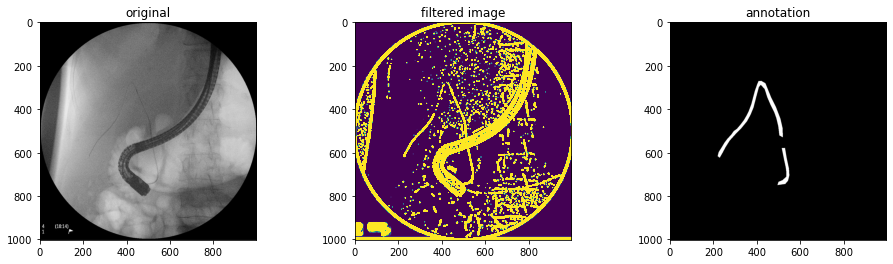

In [27]:
fig = plt.figure(figsize=plt.figaspect(0.25))
    
ax = fig.add_subplot(1, 3, 1)
ax.imshow(test_img_109,cmap="gray")
ax.set_title("original")

ax = fig.add_subplot(1, 3, 2)
ax.imshow(filtered_img109_jerman, vmin=0, vmax=0.001)
ax.set_title("filtered image")

ax = fig.add_subplot(1, 3, 3)
ax.imshow(annot109,cmap="gray")
ax.set_title("annotation")

Text(0.5, 1.0, 'hysteresis threshold filtered image')

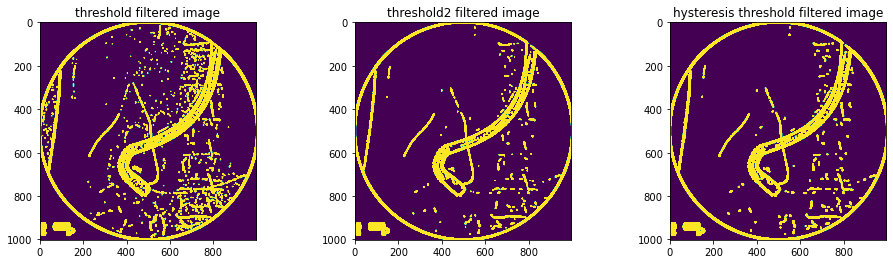

In [28]:
fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(1, 3, 1)
ax.imshow(threshold_img109_jerman, vmin=0, vmax=0.001)
ax.set_title("threshold filtered image")

ax = fig.add_subplot(1, 3, 2)
ax.imshow(threshold2_img109_jerman, vmin=0, vmax=0.001)
ax.set_title("threshold2 filtered image")

ax = fig.add_subplot(1, 3, 3)
ax.imshow(threshold_hyst_img109_jerman, vmin=0, vmax=0.001)
ax.set_title("hysteresis threshold filtered image")

#### different value of tau for image 109

scale = 3


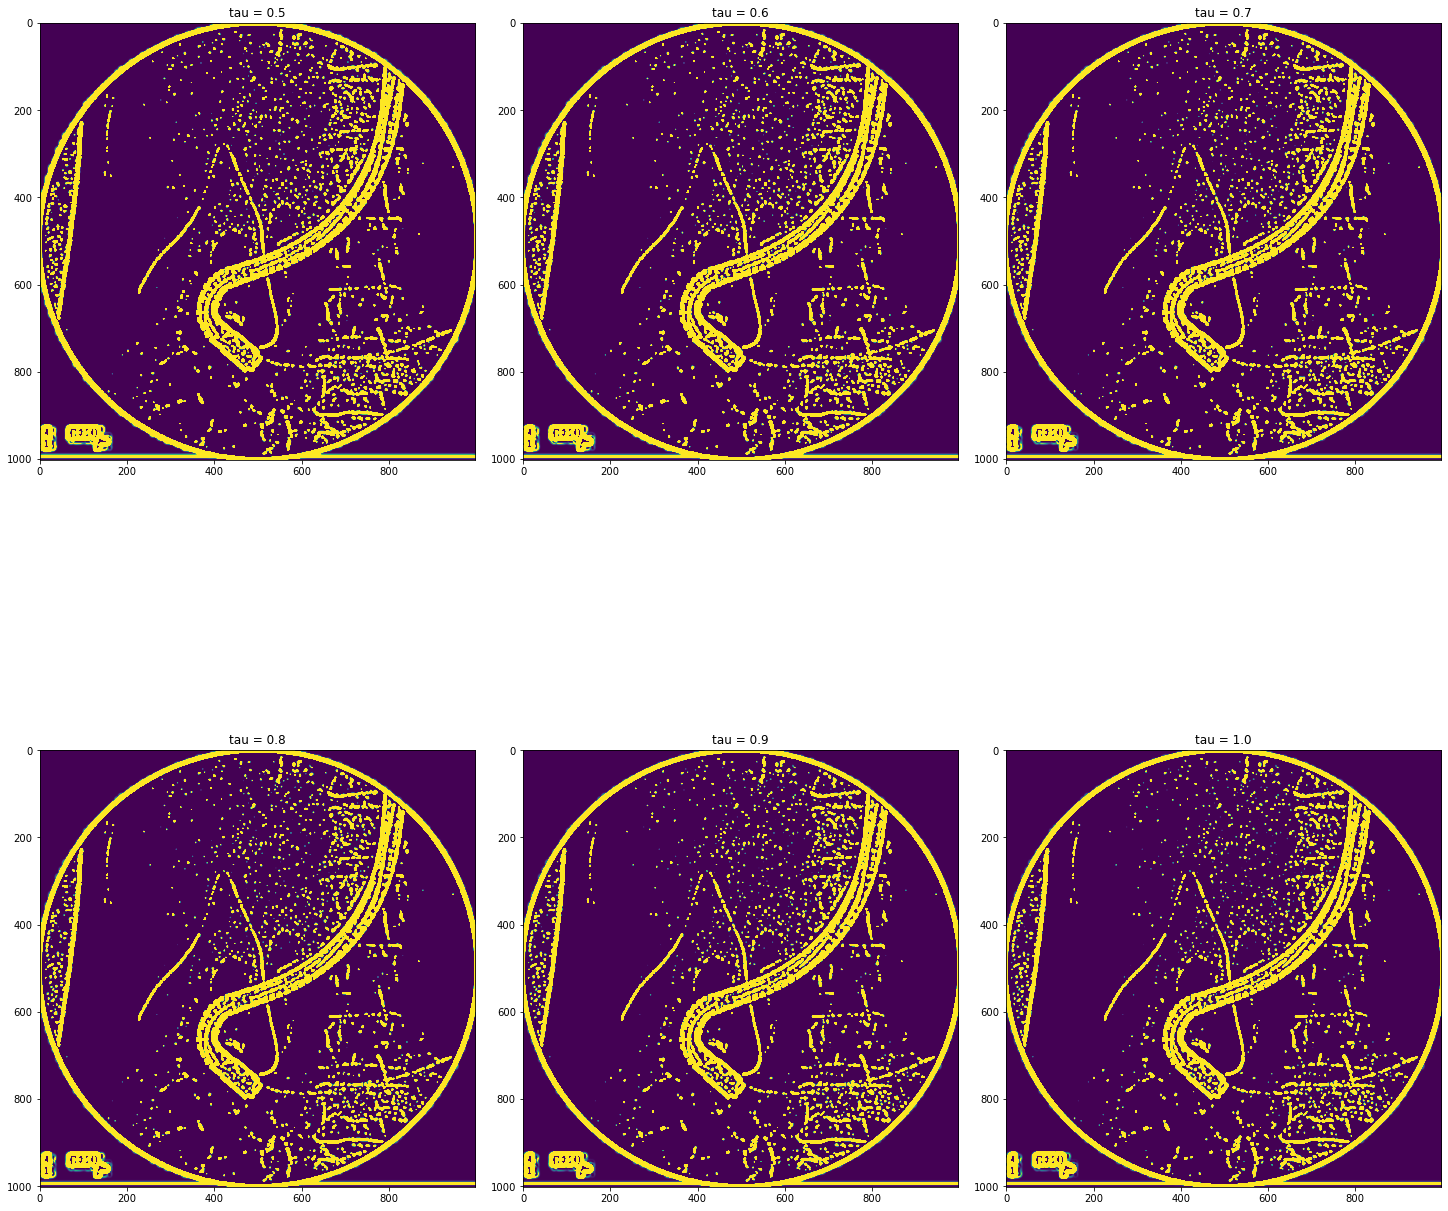

In [134]:
w,h=800,800  
print("scale = 3")
axs = (plt.figure(constrained_layout=True,figsize=(w/40,h/40)).subplots(2, 3,sharex=False, sharey=False))

for i in range(0,6) :
    filtered_img109_jerman = jerman_function(test_img_109, 3, i*0.1 + 0.5)
    title = "tau = " + str(i*0.1 + 0.5)
    
    if i <= 2 :
        axs[0][i].imshow(filtered_img109_jerman, vmin=0, vmax=0.001)
        axs[0][i].set_title(title)
    else :
        axs[1][i-3].imshow(filtered_img109_jerman, vmin=0, vmax=0.001)
        axs[1][i-3].set_title(title)


#### Comparaison Mean-0.4 threshold and normal 0.05 threshold for image 109

scale = 3


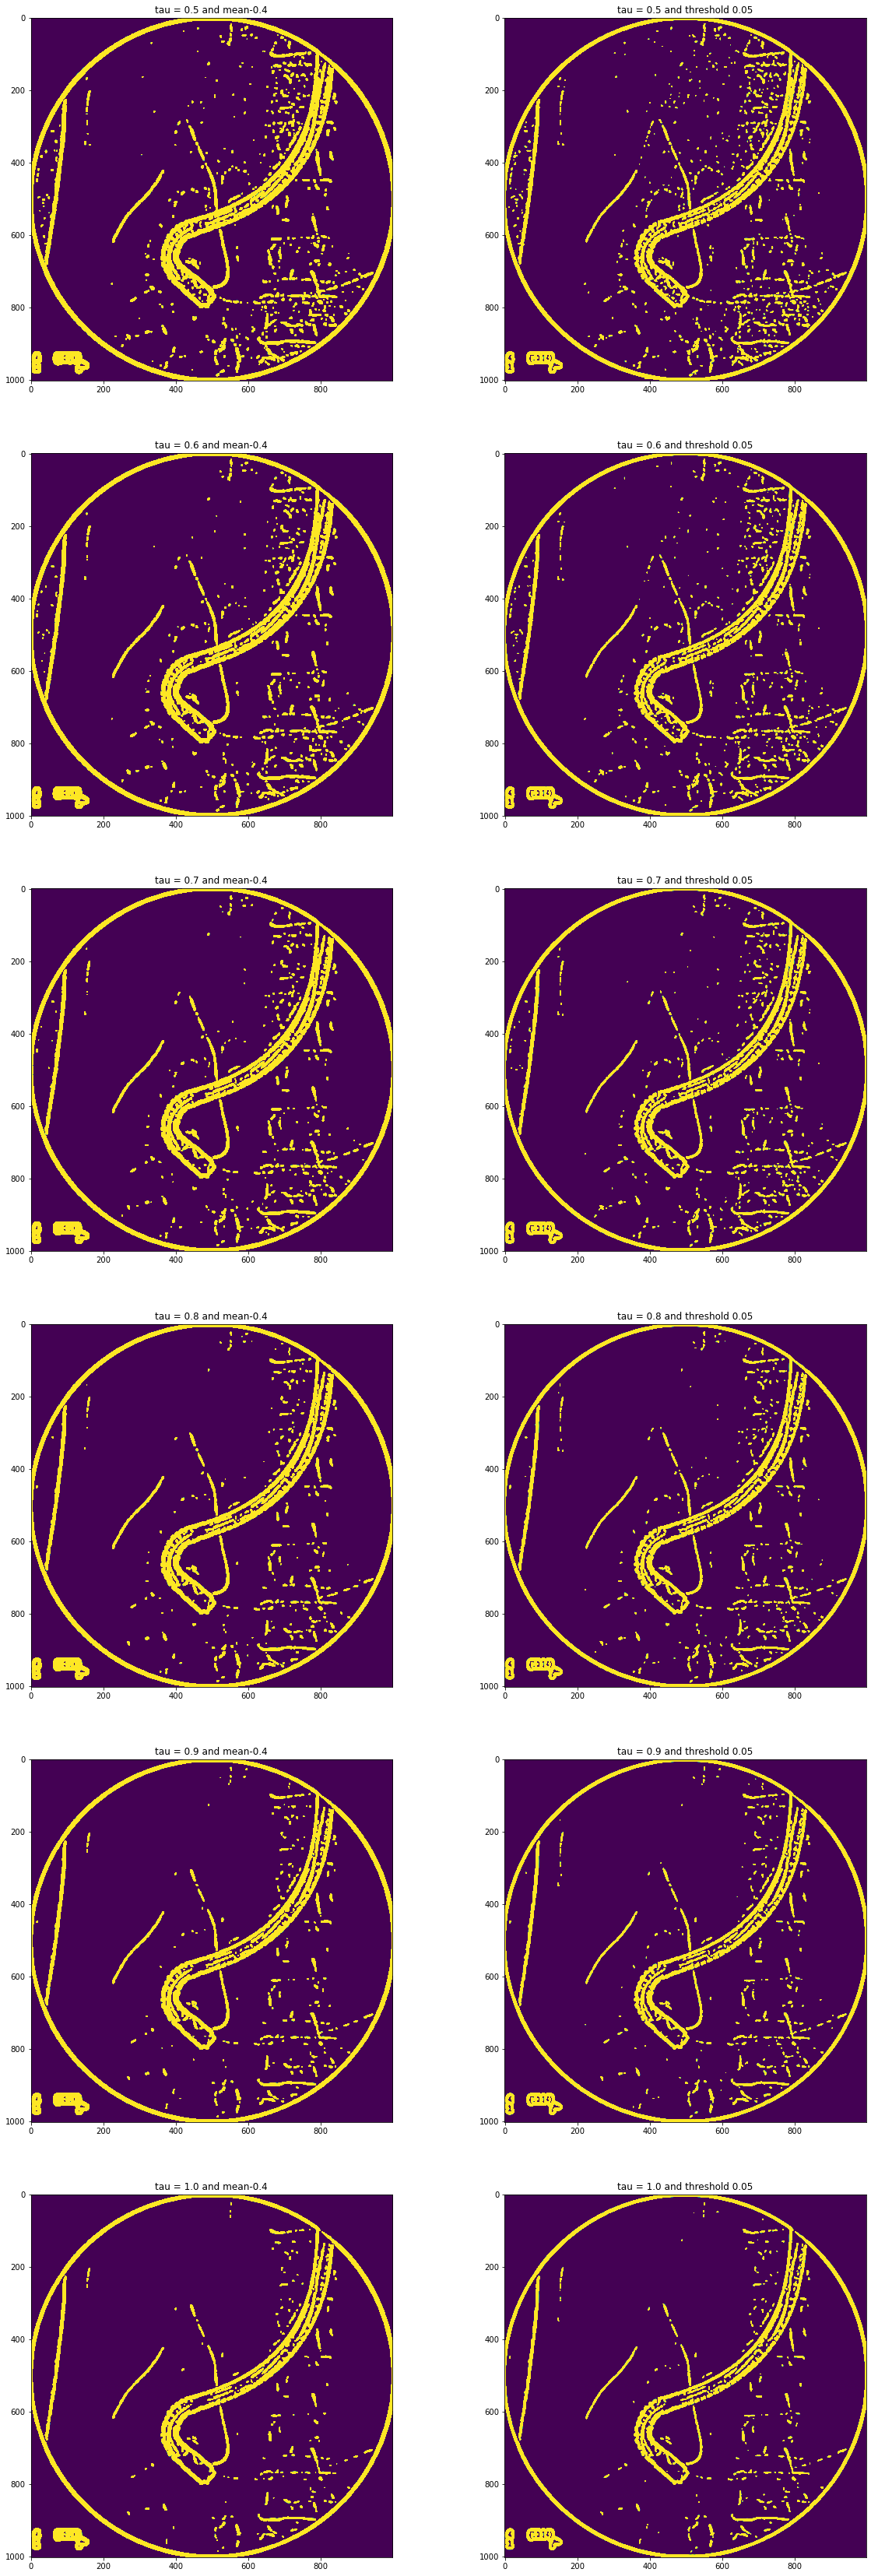

In [157]:
w,h=800,800  
print("scale = 3")
#axs = (plt.figure(constrained_layout=True,figsize=(w/40,h/40)).subplots(6, 2,sharex=False, sharey=False))
plt.subplots(figsize=(20, 60))

for i in range(0,6) :
    filtered_img109_jerman = jerman_function(test_img_109, 3, i*0.1 + 0.5)
    thr_jerman_109 = threshold(filtered_img109_jerman, 0.05)
    thr_mean_jerman_109 = mean_C_thresh(filtered_img109_jerman, 0.4)
    
    title = "tau = " + str(i*0.1 + 0.5)
    title0 = title + " and mean-0.4"
    title1 = title + " and threshold 0.05"
    
    plt.subplot(6,2,i*2+1)
    plt.imshow(thr_mean_jerman_109, vmin=0, vmax=0.001)
    plt.title(title0)

    plt.subplot(6,2,i*2+2)
    plt.imshow(thr_jerman_109, vmin=0, vmax=0.001)
    plt.title(title1)

The Mean-C thresholding seem really effective and gives better result than simple thresholding

#### Multiscale

In [29]:
multi_jerman_109 = multiscale_Jerman(test_img_109, [3.,3.2,3.4,3.6,3.8,4.], 0.8)

Text(0.5, 1.0, 'multiscale filtered image')

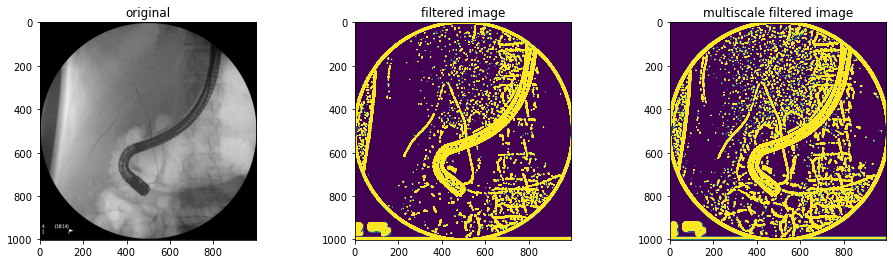

In [30]:
fig = plt.figure(figsize=plt.figaspect(0.25))
    
ax = fig.add_subplot(1, 3, 1)
ax.imshow(test_img_109,cmap="gray")
ax.set_title("original")

ax = fig.add_subplot(1, 3, 2)
ax.imshow(filtered_img109_jerman, vmin=0, vmax=0.001)
ax.set_title("filtered image")

ax = fig.add_subplot(1, 3, 3)
ax.imshow(multi_jerman_109, vmin=0, vmax=0.001)
ax.set_title("multiscale filtered image")

#### Variations of scale

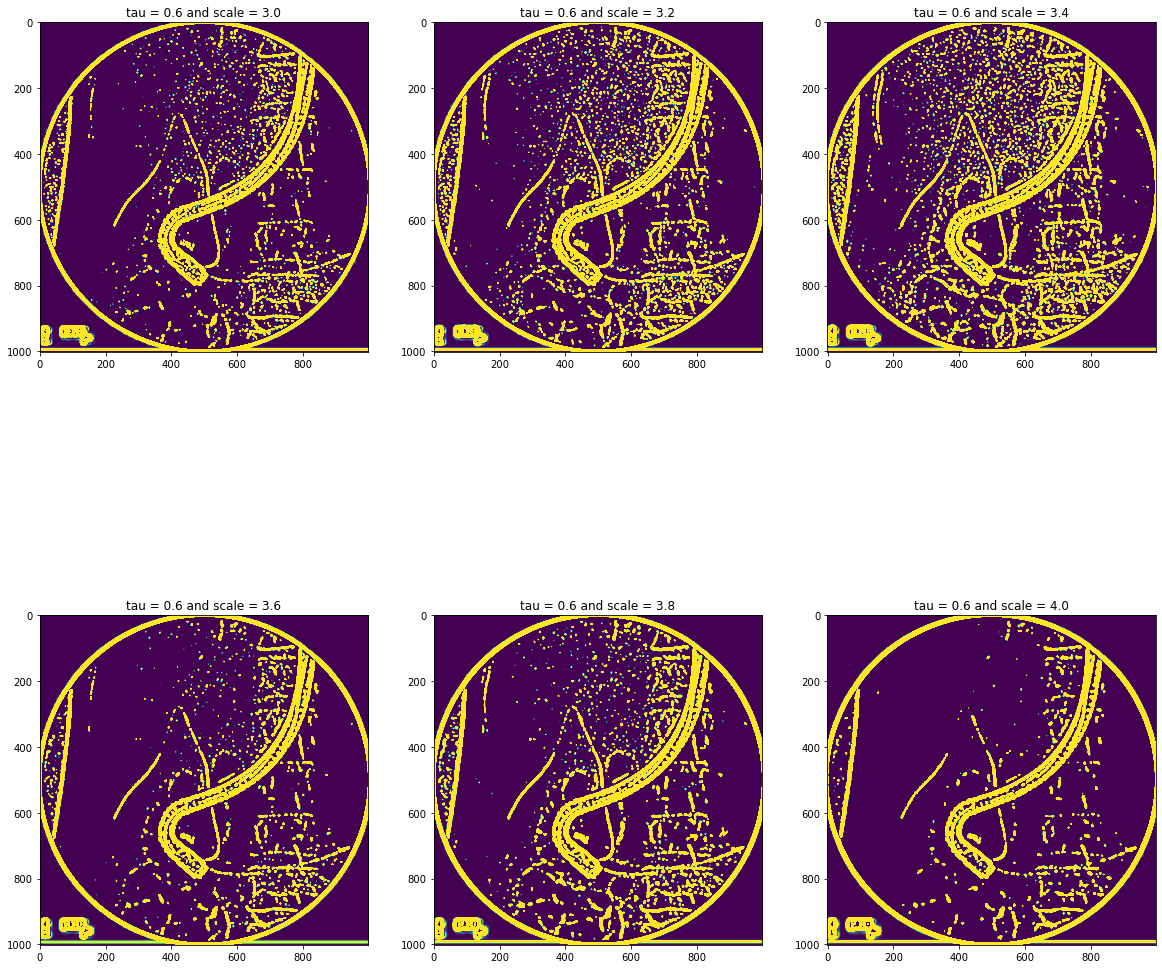

In [181]:
plt.subplots(figsize=(20, 20))

tab = [3.,3.2,3.4,3.6,3.8,4.]

for i in range(len(tab)) :
    filtered_img109_jerman = jerman_function(test_img_109, tab[i], 0.8)
    title = "tau = 0.6 and scale = " + str(tab[i])
    
    plt.subplot(2,3,i+1)
    plt.imshow(filtered_img109_jerman, vmin=0, vmax=0.001)
    plt.title(title)

#### image 108

In [113]:
filtered_img108_jerman = jerman_function(test_img_108, 3, 0.5)

In [122]:
threshold_img108_jerman = threshold(filtered_img108_jerman,0.05)
threshold2_img108_jerman = threshold(filtered_img108_jerman,0.2)
threshold_hyst_img108_jerman = hysteresis_threshold(filtered_img108_jerman, 0.2, 0.05)

Text(0.5, 1.0, 'annotation')

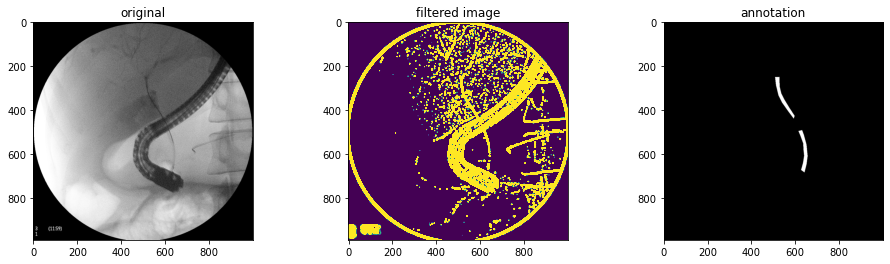

In [114]:
fig = plt.figure(figsize=plt.figaspect(0.25))
    
ax = fig.add_subplot(1, 3, 1)
ax.imshow(test_img_108,cmap="gray")
ax.set_title("original")

ax = fig.add_subplot(1, 3, 2)
ax.imshow(filtered_img108_jerman, vmin=0, vmax=0.001)
ax.set_title("filtered image")

ax = fig.add_subplot(1, 3, 3)
ax.imshow(annot108,cmap="gray")
ax.set_title("annotation")

Text(0.5, 1.0, 'hysteresis threshold filtered image')

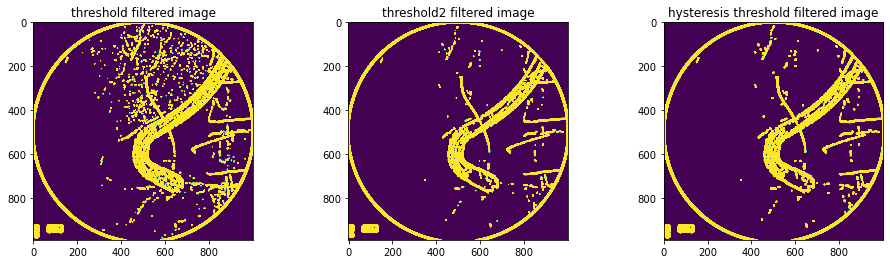

In [126]:
fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(1, 3, 1)
ax.imshow(threshold_img108_jerman, vmin=0, vmax=0.001)
ax.set_title("threshold filtered image")

ax = fig.add_subplot(1, 3, 2)
ax.imshow(threshold2_img108_jerman, vmin=0, vmax=0.001)
ax.set_title("threshold2 filtered image")

ax = fig.add_subplot(1, 3, 3)
ax.imshow(threshold_hyst_img108_jerman, vmin=0, vmax=0.001)
ax.set_title("hysteresis threshold filtered image")

#### Note :
For now, the hysteresis threshold takes a long time to compute and does not give a real better result. It is not worth it to use it rather than a simple threshold.

# 